In [1259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

In [2037]:
# reading whole data from csv file
# date should be parsed as datetime in order to automatically sort in dataframes, and this is important because working with time-series
df = pd.read_csv('../Data/BP_data.csv', skiprows=[1], parse_dates=[['Date', 'Time']])
df

Date_Time  SampleID      Dataset  SiteNumber   latitude  \
0      2014-06-11 18:15:00         1         Buoy           1  50.586139   
1      2014-06-11 18:30:00         2         Buoy           1  50.586139   
2      2014-06-11 18:45:00         3         Buoy           1  50.586139   
3      2014-06-11 19:00:00         4         Buoy           1  50.586139   
4      2014-06-11 19:15:00         5         Buoy           1  50.586139   
...                    ...       ...          ...         ...        ...   
110085 2019-08-30 11:37:00    110085  Calibration           1  50.586139   
110086 2019-09-03 12:05:00    110086  Calibration           1  50.586139   
110087 2019-09-03 12:05:00    110087  Calibration           1  50.586139   
110088 2019-09-03 12:05:00    110088  Calibration           1  50.586139   
110089 2019-09-03 12:05:00    110089  Calibration           1  50.586139   

         Longitude  BottomDepth  sampledepth  SecchiDiskDepth  SamplingInScum  \
0      -105.384833          4.3          NaN              NaN             NaN   
1      -105.384833          4.3          NaN              NaN             NaN   
2      -105.384833          4.3          NaN              NaN             NaN   
3      -105.384833          4.3          NaN              NaN             NaN   
4      -105.384833          4.3          NaN              NaN             NaN   
...            ...          ...          ...              ...             ...   
110085 -105.384833          4.3          3.5              NaN             NaN   
110086 -105.384833          4.3          0.0              NaN             NaN   
110087 -105.384833          4.3          0.8              NaN             NaN   
110088 -105.384833          4.3          2.8              NaN             NaN   
110089 -105.384833          4.3          3.5              NaN             NaN   

        Lab_Chla  TSS  PARExtinction  TurbidityLab  TurbShallowField   DOC  \
0            NaN  NaN            NaN           NaN               7.1   NaN   
1            NaN  NaN            NaN           NaN               7.5   NaN   
2            NaN  NaN            NaN           NaN               7.8   NaN   
3            NaN  NaN            NaN           NaN               7.3   NaN   
4            NaN  NaN            NaN           NaN               7.0   NaN   
...          ...  ...            ...           ...               ...   ...   
110085       NaN  NaN            NaN           NaN               NaN   NaN   
110086       NaN  NaN            NaN           NaN               NaN   NaN   
110087       NaN  NaN            NaN           NaN               NaN  4.94   
110088       NaN  NaN            NaN           NaN               NaN  4.88   
110089       NaN  NaN            NaN           NaN               NaN   NaN   

         Bat  WindDir  WindSp  AirTemp  RelativeHum  BarometricPress  \
0       12.5    269.0     3.4    17.50         31.0            957.0   
1       12.6    198.0     4.5    17.56         38.0            957.0   
2       12.6    242.0     3.8    17.50         35.0            957.3   
3       12.6    220.0     3.1    17.17         37.0            957.3   
4       12.3    223.0     3.2    17.17         44.0            957.3   
...      ...      ...     ...      ...          ...              ...   
110085   NaN      NaN     NaN      NaN          NaN              NaN   
110086   NaN      NaN     NaN      NaN          NaN              NaN   
110087   NaN      NaN     NaN      NaN          NaN              NaN   
110088   NaN      NaN     NaN      NaN          NaN              NaN   
110089   NaN      NaN     NaN      NaN          NaN              NaN   

        DailyRain  PARAirFlags  PARW1  PARW2  CO2Shallow  CO2Deep  \
0             0.0        405.0    NaN    NaN       342.7    318.3   
1             0.0        410.0    NaN    NaN       336.8    329.4   
2             0.0        352.0    NaN    NaN       338.3    325.2   
3             0.0        271.0    NaN    NaN       33

In [2053]:
# create buoy dataset - drop the measurements not coming with buoy data as well as rows from other datasets
filt_dataset_buoy = df['Dataset'] == 'Buoy'
df_buoy = df[filt_dataset_buoy].drop(['SampleID','Dataset','SiteNumber','latitude','Longitude','BottomDepth','sampledepth','SecchiDiskDepth','SamplingInScum','Lab_Chla','TSS','PARExtinction','TurbidityLab','DOC','Lab_chlaOutlier','biomassCyanobacteria','biomassChlorophyte','biomassEuglenophyte','biomassChrysophyte','biomassDiatom','biomassCryptophyte','biomassDinoflagellate','biomassTotal','Cyanobacteria','Chlorophyte','Euglenophyte','Chrysophyte','Diatom','Cryptophyte','Dinoflagellate','cellcountTotal','Bluegreen_Anabaena','Bluegreen_AgmenellumMerismopedia','Bluegreen_Anacystis','Bluegreen_Gomphosphaeria','Bluegreen_Oscillatoria','Bluegreen_Aphanizomenon','Green_Chlorella','Green_Clostrium','Green_Scenedesmus','Green_Ankistrodesmus','Green_Oocystis','Green_Chodetella','Green_Botryococcus','Green_Mougeotia','Green_Phytoconis','Green_Sphaerocystis','Green_Spirogyra','Green_Tetraedron','Green_Polyedriopsis','Green_Ulothrix','Green_Pediastrum','Green_Schroderia','Diatom_Cyclotella','Diatom_Synedra','Diatom_Cocconeis','Diatom_Nitzchia','Diatom_Navicula','Diatom_Fragillaria','Diatom_Tabellaria','Diatom_Gomphenema','Diatom_Astrionella','Flagellates','Other'], axis=1)
df_buoy

Date_Time  TurbShallowField   Bat  WindDir  WindSp  AirTemp  \
0      2014-06-11 18:15:00               7.1  12.5    269.0     3.4    17.50   
1      2014-06-11 18:30:00               7.5  12.6    198.0     4.5    17.56   
2      2014-06-11 18:45:00               7.8  12.6    242.0     3.8    17.50   
3      2014-06-11 19:00:00               7.3  12.6    220.0     3.1    17.17   
4      2014-06-11 19:15:00               7.0  12.3    223.0     3.2    17.17   
...                    ...               ...   ...      ...     ...      ...   
109163 2019-10-03 09:20:00               5.7  11.2    112.0     9.5     5.00   
109164 2019-10-03 09:30:00               NaN   NaN      NaN     NaN      NaN   
109165 2019-10-03 09:40:00               NaN   NaN      NaN     NaN      NaN   
109166 2019-10-03 09:50:00               NaN   NaN      NaN     NaN      NaN   
109167 2019-10-03 10:00:00               NaN   NaN      NaN     NaN      NaN   

        RelativeHum  BarometricPress  DailyRain  PARAirFlags  PARW1  PARW2  \
0              31.0            957.0        0.0        405.0    NaN    NaN   
1              38.0            957.0        0.0        410.0    NaN    NaN   
2              35.0            957.3        0.0        352.0    NaN    NaN   
3              37.0            957.3        0.0        271.0    NaN    NaN   
4              44.0            957.3        0.0         82.0    NaN    NaN   
...             ...              ...        ...          ...    ...    ...   
109163         85.0             28.4        0.0        253.0   77.0   17.0   
109164          NaN              NaN        NaN          NaN    NaN    NaN   
109165          NaN              NaN        NaN          NaN    NaN    NaN   
109166          NaN              NaN        NaN          NaN    NaN    NaN   
109167          NaN              NaN        NaN          NaN    NaN    NaN   

        CO2Shallow  CO2Deep  TempShallow  SpCondShallow  pHShallow  \
0            342.7    318.3        17.28          480.0       8.53   
1            336.8    329.4        17.30          481.0       8.51   
2            338.3    325.2        17.30          481.0       8.50   
3            338.3    326.1        17.29          481.0       8.53   
4            336.8    336.4        17.27          482.0       8.55   
...            ...      ...          ...            ...        ...   
109163       154.8      NaN         8.48          476.0       8.09   
109164         NaN      NaN          NaN            NaN        NaN   
109165         NaN      NaN          NaN            NaN        NaN   
109166         NaN      NaN          NaN            NaN        NaN   
109167         NaN      NaN          NaN            NaN        NaN   

        pHmVShallow  ChlRFUShallow  ChlorophyllShallow  BGAPCShallowRFU  \
0            -116.3            2.8                11.1              3.6   
1            -115.1            2.6                10.7              3.4   
2            -115.0            2.7                10.7              3.2   
3            -116.3            2.5                10.1              3.7   
4            -117.3            2.5                10.1              3.2   
...             ...            ...                 ...              ...   
109163        -73.4            3.1                13.6              7.6   
109164          NaN            NaN                 NaN              NaN   
109165          NaN            NaN                 NaN              NaN   
109166          NaN            NaN                 NaN              NaN   
109167          NaN            NaN                 NaN              NaN   

        BGAPCShallow  ODOSatShallow  ODOShallow  TempDeep  SpCondDeep  pHDeep  \
0            11770.0            NaN        8.77     17.22       472.0    8.63   
1            11127.0            NaN        8.80     17.23       472.0    8.67   
2            10705.0            NaN        8.81     17.22       473.0    8.68   
3            12167.0            NaN        8.83     1

In [2039]:
# create Lab dataset
filt_dataset = df['Dataset'] != 'Buoy'
df_lab = df[filt_dataset][['Date_Time','SiteNumber','Lab_Chla','sampledepth','Lab_chlaOutlier','latitude','Longitude']]
df_lab

Date_Time      Dataset  SiteNumber     Lab_Chla  sampledepth  \
109168 2015-06-01 15:10:00       Survey           5    13.730000          1.0   
109169 2015-06-10 14:20:00       Survey           5    45.370000          1.0   
109170 2015-07-13 10:10:00       Survey           5    14.250000          1.0   
109171 2015-08-24 14:10:00       Survey           5    99.770000          1.0   
109172 2015-10-21 11:40:00       Survey           5    17.130000          1.0   
109173 2016-04-12 10:30:00       Survey           5    11.310000          1.0   
109174 2016-05-19 10:10:00       Survey           5     3.190000          1.0   
109175 2016-07-20 09:50:00       Survey           5    30.940000          1.0   
109176 2016-09-22 09:10:00       Survey           5    36.070000          1.0   
109177 2017-05-15 10:50:00       Survey           5     5.170000          1.0   
109178 2017-06-12 09:50:00       Survey           5     7.260000          1.0   
109179 2017-07-11 09:40:00       Survey           5    15.160000          1.0   
109180 2017-08-09 10:20:00       Survey           5    44.020000          0.5   
109181 2017-09-12 09:50:00       Survey           5    54.550000          1.0   
109182 2018-05-23 10:40:00       Survey           5     6.000000          1.0   
109183 2018-06-19 14:40:00       Survey           5     5.910000          1.0   
109184 2018-07-17 09:50:00       Survey           5     8.810000          1.0   
109185 2018-08-21 08:50:00       Survey           5    67.120000          1.0   
109186 2018-09-27 14:00:00       Survey           5    14.370000          1.0   
109187 2019-04-22 09:50:00       Survey           5     6.790000          1.0   
109188 2019-05-28 10:05:00       Survey           5     4.070000          1.0   
109189 2019-06-27 15:00:00       Survey           5    17.310000          1.0   
109190 2019-07-22 11:00:00       Survey           5     2.240000          1.0   
109191 2019-08-15 10:30:00       Survey           5    40.380000          1.0   
109192 2019-09-23 10:30:00       Survey           5    14.480000          1.0   
109193 2019-04-22 09:30:00       Survey           4     3.990000          1.0   
109194 2019-05-28 09:40:00       Survey           4     4.160000          1.0   
109195 2019-06-27 15:20:00       Survey           4    14.590000          1.0   
109196 2019-07-22 10:05:00       Survey           4    81.730000          1.0   
109197 2019-08-15 09:45:00       Survey           4    92.700000          1.0   
109198 2019-09-23 10:10:00       Survey           4    19.690000          1.0   
109199 2015-06-01 14:30:00       Survey           4    22.740000          1.0   
109200 2015-06-01 14:50:00       Survey           4    18.200000          3.0   
109201 2015-06-10 13:40:00       Survey           4    31.150000          1.0   
109202 2015-07-13 09:40:00       Survey           4    18.750000          1.0   
109203 2015-08-24 13:40:00       Survey           4    56.320000          1.0   
109204 2015-10-21 11:00:00       Survey           4    13.070000          1.0   
109205 2016-04-12 09:40:00       Survey           4     8.370000          1.0   
109206 2016-05-19 09:40:00       Survey           4     2.240000          1.0   
109207 2016-07-20 09:30:00       Survey           4    55.490000          1.0   
109208 2016-09-22 08:50:00       Survey           4    35.210000          1.0   
109209 2017-03-21 13:20:00       Survey           4     9.950000          1.0   
109210 2017-05-15 10:10:00       Survey           4     5.910000          1.0   
109211 2017-06-12 09:30:00       Survey           4     7.260000          1.0   
109212 2017-07-11 09:20:00       Survey           4    25.010000          1.0   
109213 2017-08-09 09:50:00       Survey           4    27.270000          1.0   
109214 2017-09-12 09:20:00       Survey           4    29.540000          1.0   
109215 2018-05-23 11:20:00       Survey           4     5.310000          1.0   
109216 2018-06-19 14:10:00       Survey         

# Preparing lab dataset

some outliers in lab chla data can be detected in time-series along with other chla observations. we did that manually and list outliers as a column in dataset.

In [2040]:
# drop the lab observations detected as outliers 
filt_outlier = df_lab['Lab_chlaOutlier'] == 1
df_lab.drop(df_lab[filt_outlier].index, axis=0, inplace=True)
# drop the associated column 
df_lab.drop('Lab_chlaOutlier', axis=1, inplace=True)
df_lab.shape

(921, 7)

In [2043]:
# drop observations with nan values as chla_lab 
df_lab.dropna(subset= ['Lab_Chla'], axis=0, inplace=True)
df_lab.shape

(720, 7)

In [2044]:
#exclude lab data from stations 5-16
filt_station = df_lab['SiteNumber'] < 5
df_lab = df_lab[filt_station]
df_lab

Date_Time      Dataset  SiteNumber     Lab_Chla  sampledepth  \
109193 2019-04-22 09:30:00       Survey           4     3.990000          1.0   
109194 2019-05-28 09:40:00       Survey           4     4.160000          1.0   
109195 2019-06-27 15:20:00       Survey           4    14.590000          1.0   
109196 2019-07-22 10:05:00       Survey           4    81.730000          1.0   
109197 2019-08-15 09:45:00       Survey           4    92.700000          1.0   
109198 2019-09-23 10:10:00       Survey           4    19.690000          1.0   
109199 2015-06-01 14:30:00       Survey           4    22.740000          1.0   
109200 2015-06-01 14:50:00       Survey           4    18.200000          3.0   
109201 2015-06-10 13:40:00       Survey           4    31.150000          1.0   
109202 2015-07-13 09:40:00       Survey           4    18.750000          1.0   
109203 2015-08-24 13:40:00       Survey           4    56.320000          1.0   
109204 2015-10-21 11:00:00       Survey           4    13.070000          1.0   
109205 2016-04-12 09:40:00       Survey           4     8.370000          1.0   
109206 2016-05-19 09:40:00       Survey           4     2.240000          1.0   
109207 2016-07-20 09:30:00       Survey           4    55.490000          1.0   
109208 2016-09-22 08:50:00       Survey           4    35.210000          1.0   
109209 2017-03-21 13:20:00       Survey           4     9.950000          1.0   
109210 2017-05-15 10:10:00       Survey           4     5.910000          1.0   
109211 2017-06-12 09:30:00       Survey           4     7.260000          1.0   
109212 2017-07-11 09:20:00       Survey           4    25.010000          1.0   
109214 2017-09-12 09:20:00       Survey           4    29.540000          1.0   
109215 2018-05-23 11:20:00       Survey           4     5.310000          1.0   
109216 2018-06-19 14:10:00       Survey           4    20.970000          1.0   
109217 2018-07-17 09:20:00       Survey           4    39.700000          1.0   
109218 2018-08-21 08:20:00       Survey           4    11.400000          1.0   
109219 2018-09-27 13:30:00       Survey           4    12.110000          1.0   
109470 2014-01-13 05:00:00          WTP           2     6.000000          3.0   
109472 2014-01-27 05:00:00          WTP           2     7.000000          3.0   
109474 2014-02-10 05:00:00          WTP           2    19.000000          3.0   
109476 2014-02-24 05:00:00          WTP           2    14.000000          3.0   
109478 2014-03-10 05:00:00          WTP           2     8.000000          3.0   
109480 2014-03-24 05:00:00          WTP           2    30.000000          3.0   
109484 2014-04-14 05:00:00          WTP           2    15.000000          3.0   
109486 2014-04-22 05:00:00          WTP           2     8.000000          3.0   
109487 2014-04-24 05:00:00          WTP           2     7.000000          3.0   
109488 2014-04-28 05:00:00          WTP           2     4.000000          3.0   
109489 2014-05-01 05:00:00          WTP           2     6.000000          3.0   
109490 2014-05-05 05:00:00          WTP           2     9.000000          3.0   
109491 2014-05-08 05:00:00          WTP           2    15.000000          3.0   
109492 2014-05-12 05:00:00          WTP           2    27.000000          3.0   
109493 2014-05-15 05:00:00          WTP           2    48.000000          3.0   
109494 2014-05-20 05:00:00          WTP           2    33.000000          3.0   
109495 2014-05-22 05:00:00          WTP           2    22.000000          3.0   
109496 2014-05-26 05:00:00          WTP           2    13.000000          3.0   
109497 2014-05-29 05:00:00          WTP           2    16.000000          3.0   
109498 2014-06-02 05:00:00          WTP           2    17.000000          3.0   
109499 2014-06-05 05:00:00          WTP           2    22.000000          3.0   
109500 2014-06-09 05:00:00          WTP           2    19.000000          3.0   
109501 2014-06-12 05:00:00          WTP         

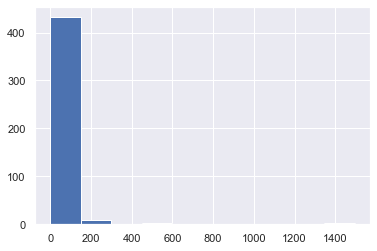

In [2045]:
df_lab.Lab_Chla.hist()

Although we see some outliers maybe due to dense scum, there is nothing to worry about because these values will not affect average of daily lab measurements because of using median instead of mean. in almost all cases we have same day measurents in deep water when we have surface measurements.

In [2046]:
# Averaging lab_chla over whole day
df_lab_ave = df_lab.groupby(df_lab.Date_Time.dt.date).agg({'Lab_Chla': 'median'})  # , 'Dataset': 'sum'
df_lab_ave

Lab_Chla
Date_Time             
2014-01-13    6.000000
2014-01-27    7.000000
2014-02-10   19.000000
2014-02-24   14.000000
2014-03-10    8.000000
2014-03-24   30.000000
2014-04-14   15.000000
2014-04-22    8.000000
2014-04-24    7.000000
2014-04-28    4.000000
2014-05-01    6.000000
2014-05-05    9.000000
2014-05-08   15.000000
2014-05-12   21.435000
2014-05-15   48.000000
2014-05-20   33.000000
2014-05-22   22.000000
2014-05-26   13.000000
2014-05-29   16.000000
2014-06-02   17.000000
2014-06-05   22.000000
2014-06-09   15.955000
2014-06-12   16.000000
2014-06-16   14.000000
2014-06-19   17.000000
2014-06-23   19.140000
2014-06-26   18.000000
2014-07-02   32.000000
2014-07-07   43.565000
2014-07-10   25.000000
2014-07-14   80.000000
2014-07-17   28.000000
2014-07-21   58.365000
2014-07-24   50.000000
2014-07-28   41.000000
2014-07-31   37.830933
2014-08-05   37.000000
2014-08-07   39.000000
2014-08-11   47.000000
2014-08-14   28.047800
2014-08-18   38.525000
2014-08-25   18.000000
2014-09-02   15.000000
2014-09-08   16.000000
2014-09-15   16.703200
2014-09-22   28.000000
2014-09-29   24.000000
2014-10-06   13.000000
2014-10-20   14.000000
2014-11-03   13.000000
2014-12-01    8.000000
2015-01-12   33.000000
2015-02-09   26.000000
2015-03-09   20.000000
2015-04-13   18.000000
2015-04-20   58.900000
2015-05-11   11.315000
2015-05-25    9.062500
2015-05-29   17.593800
2015-06-01   20.470000
2015-06-08   34.000000
2015-06-10   31.150000
2015-06-11   62.638124
2015-06-22   43.857500
2015-06-25   18.081000
2015-07-06   51.165000
2015-07-09    4.049375
2015-07-13   22.375000
2015-07-20   18.550000
2015-07-27   45.000000
2015-07-29   48.328000
2015-07-30   40.217000
2015-07-31   45.911800
2015-08-04   37.025000
2015-08-10   35.000000
2015-08-17   61.000000
2015-08-24   55.160000
2015-09-14   26.000000
2015-09-28   23.000000
2015-10-21   13.070000
2016-01-11   16.000000
2016-02-08   29.000000
2016-03-14   11.000000
2016-04-11   12.000000
2016-04-12    8.370000
2016-05-09    3.570000
2016-05-19    2.240000
2016-05-24    3.220000
2016-05-30   10.000000
2016-06-06   11.000000
2016-06-10   11.000000
2016-06-13    6.000000
2016-06-16   27.000000
2016-06-20   19.495000
2016-06-23   18.000000
2016-06-27   24.000000
2016-07-04   34.910000
2016-07-07   43.000000
2016-07-11   39.000000
2016-07-14   59.000000
2016-07-18   50.635000
2016-07-20   55.490000
2016-07-21   69.000000
2016-07-25   52.000000
2016-08-02   80.855000
2016-08-08   75.000000
2016-08-11  105.000000
2016-08-15  149.555000
2016-08-18  159.000000
2016-08-22  106.000000
2016-08-25  107.000000
2016-08-29   57.625000
2016-09-06   85.000000
2016-09-12   82.000000
2016-09-14   71.000000
2016-09-19   67.000000
2016-09-22   47.105000
2016-09-26   66.000000
2016-10-03   34.000000
2016-10-11   33.000000
2016-10-17   18.000000
2016-10-24   16.000000
2016-10-31   24.000000
2016-11-07   19.000000
2016-11-14   26.000000
2016-11-21   30.000000
2016-12-12   45.000000
2017-01-09   47.000000
2017-02-13   34.000000
2017-03-13   15.000000
2017-03-21    9.950000
2017-04-10   20.000000
2017-05-08   16.000000
2017-05-09    9.802500
2017-05-15    5.910000
2017-05-23    6.847500
2017-06-05    8.520000
2017-06-12    9.630000
2017-06-19    8.600000
2017-07-03    9.000000
2017-07-04    7.290000
2017-07-10   21.270933
2017-07-11   25.010000
2017-07-17   34.412500
2017-07-24   38.000000
2017-07-31   65.550000
2017-08-03   94.131265
2017-08-08  131.930000
2017-08-10  196.802500
2017-08-14   75.007083
2017-08-16   83.493846
2017-08-21  104.035000
2017-08-23  166.456000
2017-08-25   99.263333
2017-08-28   32.310400
2017-09-05   41.038000
2017-09-07   21.636800
2017-09-11   25.000000
2017-09-12   29.540000
2017-09-21   23.368000
2017-10-05   14.140000
2017-10-16   12.000000
2017-11-13   16.000000
2018-05-07    5.000000
2018-05-14    5.001369
2018-05-23    5.310000
2018-05-28    4.711971
2018-05-29    1.270000
2018-06-04    8.000000
2018-06-07    3.800000
2018-06-08    8.704931
2018-06-11    6.000000
2018-06-13  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AEAF3E280>]],
      dtype=object)

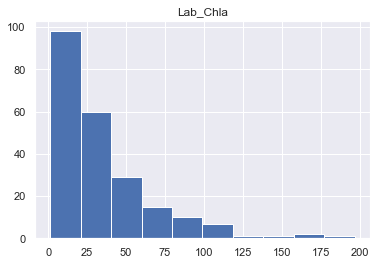

In [2047]:
df_lab_ave.hist()

we log-transform our target values to have normal distribution

In [2048]:
# log-transformation of chla lab
df_lab_ave_logTrans = np.log10(df_lab_ave)
df_lab_ave_logTrans.shape

(224, 1)

In [2049]:
# removing outliers lie in >3*sigma
Lab_chla_outlier = abs(df_lab_ave_logTrans.Lab_Chla - df_lab_ave_logTrans.Lab_Chla.mean()) > 3 * df_lab_ave_logTrans.Lab_Chla.std()
df_lab_ave_logTrans.drop(df_lab_ave_logTrans[Lab_chla_outlier]. index, axis=0, inplace=True)
df_lab_ave_logTrans.shape

(223, 1)

# Preparing Buoy dataset

In [2054]:
# drop the buoy observations associated with biofouling error
filt_biofouling = df_buoy['shallow_sonde_biofouling_outlier'] == 1
df_buoy.drop(df_buoy[filt_biofouling].index, axis=0, inplace=True)
# drop the associated column 
df_buoy.drop('shallow_sonde_biofouling_outlier', axis=1, inplace=True)
df_buoy.reset_index(drop=True, inplace=True)
df_buoy.head()

Date_Time  TurbShallowField   Bat  WindDir  WindSp  AirTemp  \
0 2014-06-11 18:15:00               7.1  12.5    269.0     3.4    17.50   
1 2014-06-11 18:30:00               7.5  12.6    198.0     4.5    17.56   
2 2014-06-11 18:45:00               7.8  12.6    242.0     3.8    17.50   
3 2014-06-11 19:00:00               7.3  12.6    220.0     3.1    17.17   
4 2014-06-11 19:15:00               7.0  12.3    223.0     3.2    17.17   

   RelativeHum  BarometricPress  DailyRain  PARAirFlags  PARW1  PARW2  \
0         31.0            957.0        0.0        405.0    NaN    NaN   
1         38.0            957.0        0.0        410.0    NaN    NaN   
2         35.0            957.3        0.0        352.0    NaN    NaN   
3         37.0            957.3        0.0        271.0    NaN    NaN   
4         44.0            957.3        0.0         82.0    NaN    NaN   

   CO2Shallow  CO2Deep  TempShallow  SpCondShallow  pHShallow  pHmVShallow  \
0       342.7    318.3        17.28          480.0       8.53       -116.3   
1       336.8    329.4        17.30          481.0       8.51       -115.1   
2       338.3    325.2        17.30          481.0       8.50       -115.0   
3       338.3    326.1        17.29          481.0       8.53       -116.3   
4       336.8    336.4        17.27          482.0       8.55       -117.3   

   ChlRFUShallow  ChlorophyllShallow  BGAPCShallowRFU  BGAPCShallow  \
0            2.8                11.1              3.6       11770.0   
1            2.6                10.7              3.4       11127.0   
2            2.7                10.7              3.2       10705.0   
3            2.5                10.1              3.7       12167.0   
4            2.5                10.1              3.2       10624.0   

   ODOSatShallow  ODOShallow  TempDeep  SpCondDeep  pHDeep  pHmVDeep  \
0            NaN        8.77     17.22       472.0    8.63    -113.9   
1            NaN        8.80     17.23       472.0    8.67    -116.3   
2            NaN        8.81     17.22       473.0    8.68    -116.9   
3            NaN        8.83     17.20       473.0    8.68    -117.1   
4            NaN        8.80     17.22       473.0    8.70    -117.8   

   BGAPCDeep  BGAPCDeepRFU  ODOSatDeep  ODODeep  CDOM  CDOMmV  Temp00  Temp01  \
0    14634.0           4.0        98.3     9.45  36.4   90.70     NaN   17.26   
1    14856.0           4.1        98.4     9.45  36.5   90.91     NaN   17.27   
2    15426.0           4.2        97.9     9.41  36.5   90.99     NaN   17.26   
3    12741.0           3.5        97.3     9.36  36.5   91.18     NaN   17.25   
4    14722.0           4.0        97.7     9.38  36.5   91.62     NaN   17.21   

   Temp02  Temp03  Temp04  
0   17.25   17.28     NaN  
1   17.24   17.27     NaN  
2   17.25   17.27     NaN  
3   17.24   17.27     NaN  
4   17.23   17.27     NaN

In [2055]:
##Add 'isDaylight' variable
# function for calculating sunset and sunrise 
import astral
from astral import LocationInfo
from astral.sun import sun
import pytz
from datetime import datetime

utc = pytz.UTC
def suntimes(date):
    loc = LocationInfo('BPL', 'Canada', 'america/regina', 50.586139, -105.384833)
    sun_times = sun(loc.observer, date, tzinfo=loc.timezone)
    return sun_times

sun_times = df_buoy.Date_Time.dt.date.apply(suntimes)
df_sun_times= pd.DataFrame(sun_times.tolist())
df_buoy['isDaylight'] = (df_buoy['Date_Time'] > df_sun_times['sunrise'].dt.tz_localize(None)) & (df_buoy['Date_Time'] < df_sun_times['sunset'].dt.tz_localize(None))

 

Check the type of features to see if all are numerical

In [2056]:
# exploring data types in df_buoy
df_buoy.dtypes

Date_Time             datetime64[ns]
TurbShallowField             float64
Bat                          float64
WindDir                      float64
WindSp                       float64
AirTemp                      float64
RelativeHum                  float64
BarometricPress              float64
DailyRain                    float64
PARAirFlags                  float64
PARW1                        float64
PARW2                        float64
CO2Shallow                   float64
CO2Deep                      float64
TempShallow                  float64
SpCondShallow                float64
pHShallow                    float64
pHmVShallow                  float64
ChlRFUShallow                float64
ChlorophyllShallow           float64
BGAPCShallowRFU              float64
BGAPCShallow                 float64
ODOSatShallow                float64
ODOShallow                   float64
TempDeep                     float64
SpCondDeep                   float64
pHDeep                       float64
p

In [2057]:
# Extract date elements as three features
df_buoy['Year'] = df_buoy.Date_Time.dt.year
df_buoy['Month'] = df_buoy.Date_Time.dt.month
df_buoy['Day'] = df_buoy.Date_Time.dt.day
df_buoy['doy'] = df_buoy.Date_Time.dt.dayofyear
df_buoy.index = df_buoy["Date_Time"]
df_buoy.drop('Date_Time', axis=1, inplace=True)

In [18]:
# # first creating a heat map to see the relation between parameters
# correlation_matrix = df_buoy.corr().round(2)  # it seems that this function is working even with nan values in data
# plt.figure(figsize=(18,18))
# sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

from the above heat map we can see that some adjacent parameters have very high correlation, and based on our knowledge we know that these are not a seperate observation, but just a calculated parameters based on calibration factors. the reason that their correaltion with the original parameter (e.g. 'BGAPCShallow' and 'BGAPCShallowRFU' is not 1 is because the calibration factors are computed for each year (different year by year) and above correlation is four all years). So for feature reduction I decided to eliminate these calculated features in further analyses. 

In [2058]:
# drop the features which are not independent measurements (except ChlorophyllShallow which I need for further analysis)
df_buoy.drop(['BGAPCDeep', 'BGAPCShallow', 'pHDeep', 'pHShallow', 'ODOSatDeep'], axis = 1, inplace=True)

# Imputing missing buoy data

In [2059]:
# what percentage of each parameter is recorded as missing values
df_buoy.isnull().sum() / len(df_buoy)

TurbShallowField      0.084714
Bat                   0.040387
WindDir               0.135847
WindSp                0.135865
AirTemp               0.097620
RelativeHum           0.092548
BarometricPress       0.091093
DailyRain             0.091093
PARAirFlags           0.040609
PARW1                 0.156550
PARW2                 0.156337
CO2Shallow            0.342203
CO2Deep               0.986232
TempShallow           0.065448
SpCondShallow         0.066356
pHmVShallow           0.065364
ChlRFUShallow         0.065819
ChlorophyllShallow    0.066486
BGAPCShallowRFU       0.065809
ODOSatShallow         0.834392
ODOShallow            0.154232
TempDeep              0.191754
SpCondDeep            0.195861
pHmVDeep              0.281716
BGAPCDeepRFU          0.393938
ODODeep               0.391806
CDOM                  0.577413
CDOMmV                0.577394
Temp00                0.305701
Temp01                0.232002
Temp02                0.231937
Temp03                0.231909
Temp04  

In [22]:
# drop the unrelated parameters to chla (based on my judgement) and features with more than %50 of data stored as nan
df_buoy = df_buoy.drop(['Bat', 'CO2Deep', 'ODOSatShallow', 'CDOM', 'CDOMmV'], axis=1).copy()
df_buoy.isnull().sum()

TurbShallowField       9137
WindDir               14652
WindSp                14654
AirTemp               10529
RelativeHum            9982
BarometricPress        9825
DailyRain              9825
PARAirFlags            4380
PARW1                 16885
PARW2                 16862
CO2Shallow            36909
TempShallow            7059
SpCondShallow          7157
pHmVShallow            7050
ChlRFUShallow          7099
ChlorophyllShallow     7171
BGAPCShallowRFU        7098
ODOShallow            16635
TempDeep              20682
SpCondDeep            21125
pHmVDeep              30385
BGAPCDeepRFU          42489
ODODeep               42259
Temp00                32972
Temp01                25023
Temp02                25016
Temp03                25013
Temp04                32982
isDaylight                0
Year                      0
Month                     0
Day                       0
doy                       0
dtype: int64

In [23]:
# # plot all features to see the time distribution of missing values to select the best approach to impute missing values
# plt.figure(figsize = [18 , 56])
# myFmt = mdates.DateFormatter('%m')
# years = df_buoy['Year'].unique()
# features = df_buoy.columns
# i = 0
# for feature in features[:-3]:  # to not include day, month and year features
#     for year in years:
#         i += 1
#         ax = plt.subplot(len(features), len(years), i)
#         filt_year = df_buoy['Year'] == year
#         ax.plot(df_buoy[filt_year][feature]) # the x-axis is the index
#         ax.xaxis.set_major_formatter(myFmt)
#         ax.text(.2, .8, str(df_buoy[filt_year][feature].isnull().sum()), horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
#         if year == 2014:
#             plt.ylabel(feature)

In [24]:
# # plot again the heatmap
# correlation_matrix = df_buoy.corr().round(2)  # it seems that this function is working even with nan values in data
# plt.figure(figsize=(18,18))
# sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

In [2060]:
# create a new dataframe for imputed data
imputed_df_buoy = df_buoy.copy()

the reason to connect each year to the next one in some cases is that , the two points in two successive years are connected to each other before imputing if both exist (non-missing). if one of them are missing (e.g. the lst measuremt in the previous year or the first measuremtn in the later year are missing) the line is not connected in it will be connected after impution of the missing value in impution algorithm.

for wind direction I think a median or mean method over month makes more sense than interpolation because the missing values are suucessive in most cases which make interpolation hard. Also it seems there is a relation between these two parameters and month in plot a couple of lines above. I chose median over mean because I think median makes more sense for direction. form a wind_rose for BPL I saw the wind direction is more in a same direction. 

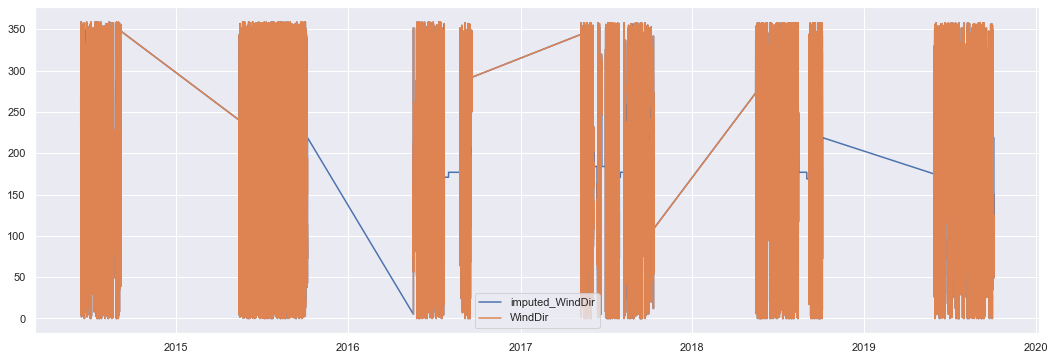

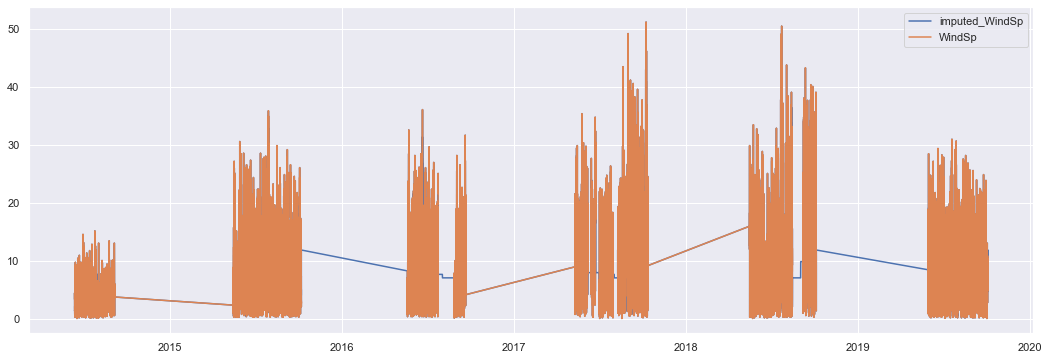

In [2061]:
# impute winddir and windspeed based on median over month
imputed_df_buoy.WindDir = df_buoy.WindDir.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.median()))
imputed_df_buoy.WindSp = df_buoy.WindSp.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.median()))

plt.figure(figsize = [18 , 6])
plt.plot(imputed_df_buoy.WindDir)
plt.plot(df_buoy.WindDir)
plt.legend(['imputed_WindDir' , 'WindDir'])

plt.figure(figsize = [18 , 6])
plt.plot(imputed_df_buoy.WindSp)
plt.plot(df_buoy.WindSp)
plt.legend(['imputed_WindSp' , 'WindSp'])

for these parameters below, it seems a monthly mean or median would be enough, based on their pattern, number and succesive of mising values, their nature, and the correlation with other parameters.

In [2062]:
# impute some parameters based on mean or median over month
imputed_df_buoy.AirTemp = df_buoy.AirTemp.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.RelativeHum = df_buoy.RelativeHum.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.BarometricPress = df_buoy.BarometricPress.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.DailyRain = df_buoy.DailyRain.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.median()))
imputed_df_buoy.PARAirFlags = df_buoy.PARAirFlags.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.median()))

I dont know yet how to deal with CO2shallow, so keep it simple for now

In [2063]:
imputed_df_buoy.CO2Shallow = df_buoy.CO2Shallow.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))

Tempshallow can be estimated from Airtemp, but the number of missing values are few, so keep it simple

In [2064]:
imputed_df_buoy.TempShallow = df_buoy.TempShallow.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))

maybe the best option?

In [2065]:
# impute with interpolation with 'time' method
imputed_df_buoy.SpCondShallow = df_buoy.SpCondShallow.interpolate(method='time')
imputed_df_buoy.pHmVShallow = df_buoy.pHmVShallow.interpolate(method='time')
imputed_df_buoy.ChlRFUShallow = df_buoy.ChlRFUShallow.interpolate(method='time')
imputed_df_buoy.BGAPCShallowRFU = df_buoy.BGAPCShallowRFU.interpolate(method='time')
imputed_df_buoy.ChlorophyllShallow = df_buoy.ChlorophyllShallow.interpolate(method='time')

I dont know yet how to deal with ODOShallow, so keep it simple for now

In [2066]:
imputed_df_buoy.ODOShallow = df_buoy.ODOShallow.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))

I know that interpolation is not good for features below because there is suucessive misssig data. and maybe the best method is to corrolate with shallow sensor for each parameter but method below is just for simplicity. 

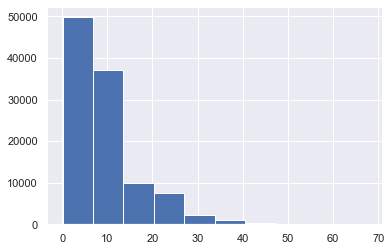

In [2067]:
#Create a Linear Regression model to estimate the missing data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_buoy[['BGAPCDeepRFU', 'BGAPCShallowRFU']])
imputed_df_buoy['BGAPCDeepRFU'] = imp.transform(df_buoy[['BGAPCDeepRFU', 'BGAPCShallowRFU']])
imputed_df_buoy['BGAPCDeepRFU'].hist()

In [2068]:
#Create a Linear Regression model to estimate the missing data
imp = IterativeImputer(max_iter=10, random_state=0)
imputed_df_buoy['TurbShallowField'] = imp.fit_transform(df_buoy[['TurbShallowField', 'BGAPCShallowRFU']])
imputed_df_buoy['TurbShallowField'].describe()

count    107857.000000
mean          9.190910
std          12.486276
min          -0.200000
25%           3.600000
50%           7.000000
75%          11.300000
max         981.400000
Name: TurbShallowField, dtype: float64

In [2070]:
#Create a Linear Regression model to estimate the missing data
imp = IterativeImputer(max_iter=10, random_state=0)
imputed_df_buoy['TempDeep'] = imp.fit_transform(df_buoy[['TempDeep', 'TempShallow', 'AirTemp']])

C:\Users\amchegoo\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [2071]:
#Create a Linear Regression model to estimate the missing data
imp = IterativeImputer(max_iter=10, random_state=0)
imputed_df_buoy['Temp00'] = imp.fit_transform(df_buoy[['Temp00', 'TempDeep', 'TempShallow', 'AirTemp']])

C:\Users\amchegoo\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [2072]:
#Create a Linear Regression model to estimate the missing data
imp = IterativeImputer(max_iter=10, random_state=0)
imputed_df_buoy['Temp01'] = imp.fit_transform(df_buoy[['Temp01', 'Temp00', 'TempDeep', 'TempShallow', 'AirTemp']])

C:\Users\amchegoo\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [2073]:
#Create a Linear Regression model to estimate the missing data
imp = IterativeImputer(max_iter=10, random_state=0)
imputed_df_buoy['Temp02'] = imp.fit_transform(df_buoy[['Temp02', 'Temp01', 'Temp00', 'TempDeep', 'TempShallow', 'AirTemp']])

C:\Users\amchegoo\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [2074]:
#Create a Linear Regression model to estimate the missing data
imp = IterativeImputer(max_iter=10, random_state=0)
imputed_df_buoy['Temp03'] = imp.fit_transform(df_buoy[['Temp03', 'Temp02', 'Temp01', 'Temp00', 'TempDeep', 'TempShallow', 'AirTemp']])

C:\Users\amchegoo\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [2075]:
#Create a Linear Regression model to estimate the missing data
imp = IterativeImputer(max_iter=10, random_state=0)
imputed_df_buoy['Temp04'] = imp.fit_transform(df_buoy[['Temp04', 'Temp03', 'Temp02', 'Temp01', 'Temp00', 'TempDeep', 'TempShallow', 'AirTemp']])

C:\Users\amchegoo\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


for PARW1 & PARW2, it seems that an ML model to predict it based on PARAirFlags and some water parameters would be the best method because of its good corelation with other parameters, having missing values for whole a year. however, for now just keep it as simple as I can with a monthly average.

In [2076]:
#Create a Linear Regression model to estimate the missing data
imp = IterativeImputer(max_iter=10, random_state=0)
imputed_df_buoy['PARW1'] = imp.fit_transform(df_buoy[['PARW1','PARAirFlags']])
imputed_df_buoy['PARW2'] = imp.fit_transform(df_buoy[['PARW1','PARAirFlags']])

In [2077]:
imputed_df_buoy.SpCondDeep = df_buoy.SpCondDeep.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.pHmVDeep = df_buoy.pHmVDeep.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))
imputed_df_buoy.ODODeep = df_buoy.ODODeep.groupby(df_buoy.Month).transform(lambda x: x.fillna(x.mean()))

In [2078]:
imputed_df_buoy.isnull().sum()

TurbShallowField           0
Bat                     4356
WindDir                    0
WindSp                     0
AirTemp                    0
RelativeHum                0
BarometricPress            0
DailyRain                  0
PARAirFlags                0
PARW1                      0
PARW2                      0
CO2Shallow                 0
CO2Deep               106372
TempShallow                0
SpCondShallow              0
pHmVShallow                0
ChlRFUShallow              0
ChlorophyllShallow         0
BGAPCShallowRFU            0
ODOSatShallow          89995
ODOShallow                 0
TempDeep                   0
SpCondDeep                 0
pHmVDeep                   0
BGAPCDeepRFU               0
ODODeep                    0
CDOM                   62278
CDOMmV                 62276
Temp00                     0
Temp01                     0
Temp02                     0
Temp03                     0
Temp04                     0
isDaylight                 0
Year          

# averaging buoy data on a daily basis

In [43]:
# Averaging buoy data over whole day
df_buoy_ave = imputed_df_buoy.groupby(imputed_df_buoy.index.date).agg('median')
df_buoy_ave

TurbShallowField  WindDir  WindSp  AirTemp  RelativeHum  \
2014-06-11               7.0     81.0    2.00   13.280         59.0   
2014-06-12               6.9    124.5    2.85   17.560         43.0   
2014-06-13               6.3    326.5    5.75   13.670         68.5   
2014-06-14               6.9    289.0    5.55   11.835         89.0   
2014-06-15               6.1    207.0    3.90   12.390         88.0   
...                      ...      ...     ...      ...          ...   
2019-09-29               6.1     26.0   16.80    2.280         91.0   
2019-09-30               5.8    248.5    7.45    1.945         90.0   
2019-10-01               5.7    224.0    5.65    3.030         83.0   
2019-10-02               5.8     98.0    6.75    2.835         83.0   
2019-10-03               5.7     73.0    7.00    2.780         88.0   

            BarometricPress  DailyRain  PARAirFlags      PARW1      PARW2  \
2014-06-11            957.7       0.00         17.0   4.894876   4.894876   
2014-06-12            958.3       0.00        232.5  74.030039  74.030039   
2014-06-13            948.2       0.51         35.5  10.829913  10.829913   
2014-06-14            946.2       2.62         42.5  13.075603  13.075603   
2014-06-15            943.4       2.49         77.0  24.143645  24.143645   
...                     ...        ...          ...        ...        ...   
2019-09-29             28.4       0.00         12.0   2.000000   2.000000   
2019-09-30             28.3       0.00         12.0   2.000000   2.000000   
2019-10-01             28.4       0.00         12.0   3.000000   3.000000   
2019-10-02             28.4       0.00         12.0   3.000000   3.000000   
2019-10-03             28.4       0.00         11.0   2.000000   2.000000   

            ...     Temp00  Temp01  Temp02  Temp03     Temp04  isDaylight  \
2014-06-11  ...  17.191281  17.160  17.160  17.190  16.969259         1.0   
2014-06-12  ...  17.272548  17.175  17.105  16.950  16.642468         1.0   
2014-06-13  ...  16.658887  16.630  16.630  16.670  16.447398         1.0   
2014-06-14  ...  15.717197  15.740  15.730  15.770  15.566286         1.0   
2014-06-15  ...  15.651054  15.670  15.650  15.625  15.371736         1.0   
...         ...        ...     ...     ...     ...        ...         ...   
2019-09-29  ...  11.565000  11.465  11.460  11.500  11.455000         0.0   
2019-09-30  ...  10.050000   9.920   9.910   9.930   9.770000         0.0   
2019-10-01  ...   9.590000   9.465   9.470   9.480   9.420000         0.0   
2019-10-02  ...   9.055000   8.930   8.920   8.960   8.910000         0.0   
2019-10-03  ...   8.710000   8.600   8.600   8.640   8.600000         0.0   

            Year  Month  Day  doy  
2014-06-11  2014      6   11  162  
2014-06-12  2014      6   12  163  
2014-06-13  2014      6   13  164  
2014-06-14  2014      6   14  165  
2014-06-15  2014      6   15  166  
...          ...    ...  ...  ...  
2019-09-29  2019      9   29  272  
2019-09-30  2019      9   30  273  
2019-10-01  2019     10    1  274  
2019-10-02  2019     10    2  275  
2019-10-03  2019     10    3  276  

[784 rows x 33 columns]

# Feature Generation

In [2080]:
filt_day = imputed_df_buoy['isDaylight'] == True
df_buoy_ave['PARW1_day'] = imputed_df_buoy[filt_day]['PARW1'].groupby(imputed_df_buoy[filt_day].index.date).agg('mean')
df_buoy_ave['PARAirFlags_day'] = imputed_df_buoy[filt_day]['PARAirFlags'].groupby(imputed_df_buoy[filt_day].index.date).agg('mean')
df_buoy_ave['PAR_normalized_day'] = df_buoy_ave['PARW1_day']/df_buoy_ave['PARAirFlags_day']
df_buoy_ave

TurbShallowField  WindDir  WindSp    AirTemp  RelativeHum  \
2014-06-11          7.000000     81.0    2.00  13.280000    59.000000   
2014-06-12          6.900000    124.5    2.85  17.560000    43.000000   
2014-06-13          6.300000    326.5    5.75  13.670000    68.500000   
2014-06-14          6.900000    289.0    5.55  11.835000    89.000000   
2014-06-15          6.100000    207.0    3.90  12.390000    88.000000   
2014-06-16          5.900000    164.5    2.30  12.890000    76.500000   
2014-06-17          5.600000    318.0    5.10  16.030000    80.000000   
2014-06-18          5.700000    322.0    6.40  15.225000    85.000000   
2014-06-19          5.800000    299.5    2.60  16.115000    79.500000   
2014-06-20          5.600000    128.0    4.95  15.725000    83.000000   
2014-06-21          5.800000    134.0    3.40  16.475000    79.000000   
2014-06-22          6.800000    140.0    6.80  15.780000    85.000000   
2014-06-23          5.850000    177.0    3.80  16.500000    85.000000   
2014-06-24          5.400000    318.0    3.30  15.475000    78.000000   
2014-06-25          4.800000    333.5    6.10  17.335000    76.000000   
2014-06-26          4.300000    184.0    3.45  17.835000    79.500000   
2014-06-27          4.300000    187.5    3.40  16.445000    86.000000   
2014-06-28          4.500000    137.5    3.30  20.280000    76.500000   
2014-06-29          6.900000    127.5    8.90  17.030000    85.500000   
2014-06-30          5.950000    167.0    9.70  16.500000    87.000000   
2014-07-01          7.000000    178.0    4.30  16.445000    75.500000   
2014-07-02          8.050000     60.5    2.40  19.280000    67.000000   
2014-07-03          6.600000    333.0    6.35  19.975000    69.500000   
2014-07-04          8.550000    171.0    4.50  21.445000    79.000000   
2014-07-05         11.200000    136.0    3.25  22.725000    76.000000   
2014-07-06         11.300000    130.0    4.05  19.170000    79.500000   
2014-07-07         13.300000    141.5    6.65  19.390000    71.000000   
2014-07-08         12.950000    171.0    4.85  18.335000    76.500000   
2014-07-09         13.300000    286.5    3.30  21.225000    69.000000   
2014-07-10         17.100000    131.5    4.20  22.085000    68.000000   
2014-07-11         16.300000     81.5    6.50  17.670000    72.000000   
2014-07-12         15.900000    100.0    5.70  19.170000    61.500000   
2014-07-13         19.200000    112.0    5.95  16.585000    62.500000   
2014-07-14         16.550000    212.5    2.00  15.695000    67.000000   
2014-07-15         10.100000    300.0    2.90  19.170000    61.000000   
2014-07-16         11.850000    282.5    2.50  20.615000    65.000000   
2014-07-17         12.900000    260.0    2.50  22.225000    71.000000   
2014-07-18          9.700000     65.5    6.70  18.335000    75.000000   
2014-07-19          8.000000    289.0    4.10  21.530000    70.500000   
2014-07-20         10.000000     90.0    3.85  20.170000    71.000000   
2014-07-21          8.700000    325.5    1.65  17.670000    84.500000   
2014-07-22          9.800000    224.5    1.80  19.780000    69.000000   
2014-07-23          6.000000    262.0    5.85  21.280000    73.000000   
2014-07-24          8.000000    267.0    5.00  19.615000    85.000000   
2014-07-25          7.500000     21.5    6.10  15.890000    71.500000   
2014-07-26          7.400000     87.0    8.90  16.725000    81.500000   
2014-07-27          6.050000    222.5    1.75  18.225000    75.500000   
2014-07-28          6.400000    260.0    2.10  19.365000    76.500000   
2014-07-29          8.850000    192.5    2.30  19.779474    77.000000   
2014-07-30          8.950000    254.5    3.45  20.835000    73.000000   
2014-07-31          7.800000    245.0    3.75  19.778948    73.000000   
2014-08-01          7.500000    238.0    2.15  19.445000    83.000000   
2014-08-02          7.350000    189.5    2.30  19.000000    84.000000   
2014-08-03          6.600000    274.0    3.05  21.335000    76.500000 

In [2081]:
# creating parameters with time lag based on averaging window
df_buoy_ave['PAR_normalized_day_SMA3'] = df_buoy_ave['PAR_normalized_day'].rolling(window=3).mean()
df_buoy_ave['PAR_normalized_day_SMA3'] = df_buoy_ave['PAR_normalized_day_SMA3'].groupby(df_buoy_ave.Month).transform(lambda x: x.fillna(x.median()))
df_buoy_ave['PAR_normalized_day_SMA3']

2014-06-11    0.431303
2014-06-12    0.431303
2014-06-13    0.317372
2014-06-14    0.316343
2014-06-15    0.316091
2014-06-16    0.317406
2014-06-17    0.318735
2014-06-18    0.317442
2014-06-19    0.317555
2014-06-20    0.316945
2014-06-21    0.318398
2014-06-22    0.318266
2014-06-23    0.318842
2014-06-24    0.318782
2014-06-25    0.318932
2014-06-26    0.329042
2014-06-27    0.328886
2014-06-28    0.328711
2014-06-29    0.318073
2014-06-30    0.317365
2014-07-01    0.317631
2014-07-02    0.318549
2014-07-03    0.319517
2014-07-04    0.319492
2014-07-05    0.319496
2014-07-06    0.319246
2014-07-07    0.319153
2014-07-08    0.379655
2014-07-09    0.379845
2014-07-10    0.379950
2014-07-11    0.319418
2014-07-12    0.319462
2014-07-13    0.319482
2014-07-14    0.319500
2014-07-15    0.322222
2014-07-16    0.322115
2014-07-17    0.321900
2014-07-18    0.318477
2014-07-19    0.318351
2014-07-20    0.318475
2014-07-21    0.318223
2014-07-22    0.318392
2014-07-23    0.318339
2014-07-24 

In [2082]:
df_buoy_ave['BGAPCShallowRFU_night'] = imputed_df_buoy[~filt_day]['BGAPCShallowRFU'].groupby(imputed_df_buoy[~filt_day].index.date).agg('median')
df_buoy_ave['ChlRFUShallow_night'] = imputed_df_buoy[~filt_day]['ChlRFUShallow'].groupby(imputed_df_buoy[~filt_day].index.date).agg('median')
df_buoy_ave['ChlorophyllShallow_night'] = imputed_df_buoy[~filt_day]['ChlorophyllShallow'].groupby(imputed_df_buoy[~filt_day].index.date).agg('median')
df_buoy_ave

TurbShallowField  WindDir  WindSp    AirTemp  RelativeHum  \
2014-06-11          7.000000     81.0    2.00  13.280000    59.000000   
2014-06-12          6.900000    124.5    2.85  17.560000    43.000000   
2014-06-13          6.300000    326.5    5.75  13.670000    68.500000   
2014-06-14          6.900000    289.0    5.55  11.835000    89.000000   
2014-06-15          6.100000    207.0    3.90  12.390000    88.000000   
2014-06-16          5.900000    164.5    2.30  12.890000    76.500000   
2014-06-17          5.600000    318.0    5.10  16.030000    80.000000   
2014-06-18          5.700000    322.0    6.40  15.225000    85.000000   
2014-06-19          5.800000    299.5    2.60  16.115000    79.500000   
2014-06-20          5.600000    128.0    4.95  15.725000    83.000000   
2014-06-21          5.800000    134.0    3.40  16.475000    79.000000   
2014-06-22          6.800000    140.0    6.80  15.780000    85.000000   
2014-06-23          5.850000    177.0    3.80  16.500000    85.000000   
2014-06-24          5.400000    318.0    3.30  15.475000    78.000000   
2014-06-25          4.800000    333.5    6.10  17.335000    76.000000   
2014-06-26          4.300000    184.0    3.45  17.835000    79.500000   
2014-06-27          4.300000    187.5    3.40  16.445000    86.000000   
2014-06-28          4.500000    137.5    3.30  20.280000    76.500000   
2014-06-29          6.900000    127.5    8.90  17.030000    85.500000   
2014-06-30          5.950000    167.0    9.70  16.500000    87.000000   
2014-07-01          7.000000    178.0    4.30  16.445000    75.500000   
2014-07-02          8.050000     60.5    2.40  19.280000    67.000000   
2014-07-03          6.600000    333.0    6.35  19.975000    69.500000   
2014-07-04          8.550000    171.0    4.50  21.445000    79.000000   
2014-07-05         11.200000    136.0    3.25  22.725000    76.000000   
2014-07-06         11.300000    130.0    4.05  19.170000    79.500000   
2014-07-07         13.300000    141.5    6.65  19.390000    71.000000   
2014-07-08         12.950000    171.0    4.85  18.335000    76.500000   
2014-07-09         13.300000    286.5    3.30  21.225000    69.000000   
2014-07-10         17.100000    131.5    4.20  22.085000    68.000000   
2014-07-11         16.300000     81.5    6.50  17.670000    72.000000   
2014-07-12         15.900000    100.0    5.70  19.170000    61.500000   
2014-07-13         19.200000    112.0    5.95  16.585000    62.500000   
2014-07-14         16.550000    212.5    2.00  15.695000    67.000000   
2014-07-15         10.100000    300.0    2.90  19.170000    61.000000   
2014-07-16         11.850000    282.5    2.50  20.615000    65.000000   
2014-07-17         12.900000    260.0    2.50  22.225000    71.000000   
2014-07-18          9.700000     65.5    6.70  18.335000    75.000000   
2014-07-19          8.000000    289.0    4.10  21.530000    70.500000   
2014-07-20         10.000000     90.0    3.85  20.170000    71.000000   
2014-07-21          8.700000    325.5    1.65  17.670000    84.500000   
2014-07-22          9.800000    224.5    1.80  19.780000    69.000000   
2014-07-23          6.000000    262.0    5.85  21.280000    73.000000   
2014-07-24          8.000000    267.0    5.00  19.615000    85.000000   
2014-07-25          7.500000     21.5    6.10  15.890000    71.500000   
2014-07-26          7.400000     87.0    8.90  16.725000    81.500000   
2014-07-27          6.050000    222.5    1.75  18.225000    75.500000   
2014-07-28          6.400000    260.0    2.10  19.365000    76.500000   
2014-07-29          8.850000    192.5    2.30  19.779474    77.000000   
2014-07-30          8.950000    254.5    3.45  20.835000    73.000000   
2014-07-31          7.800000    245.0    3.75  19.778948    73.000000   
2014-08-01          7.500000    238.0    2.15  19.445000    83.000000   
2014-08-02          7.350000    189.5    2.30  19.000000    84.000000   
2014-08-03          6.600000    274.0    3.05  21.335000    76.500000 

In [52]:
# df_buoy_ave['BGAPCShallowRFU_t-1'] = df_buoy_ave['BGAPCShallowRFU'] - df_buoy_ave['BGAPCShallowRFU'].shift(-1) 
# df_buoy_ave['BGAPCShallowRFU_t+1'] = df_buoy_ave['BGAPCShallowRFU'].shift(+1) - df_buoy_ave['BGAPCShallowRFU']
# df_buoy_ave.head()

# Merging lab and buoy datasets

In [2083]:
# inner merge both dataframe to extract coincidence dates in which we have both lab and buoy data
df_both = pd.merge(df_lab_ave_logTrans, df_buoy_ave, left_index=True, right_index=True, how='inner')
df_both

Lab_Chla  TurbShallowField  WindDir  WindSp    AirTemp  \
2014-06-12  1.204120          6.900000    124.5    2.85  17.560000   
2014-06-16  1.146128          5.900000    164.5    2.30  12.890000   
2014-06-19  1.230449          5.800000    299.5    2.60  16.115000   
2014-06-23  1.281942          5.850000    177.0    3.80  16.500000   
2014-06-26  1.255273          4.300000    184.0    3.45  17.835000   
2014-07-02  1.505150          8.050000     60.5    2.40  19.280000   
2014-07-07  1.639138         13.300000    141.5    6.65  19.390000   
2014-07-10  1.397940         17.100000    131.5    4.20  22.085000   
2014-07-14  1.903090         16.550000    212.5    2.00  15.695000   
2014-07-17  1.447158         12.900000    260.0    2.50  22.225000   
2014-07-21  1.766152          8.700000    325.5    1.65  17.670000   
2014-07-24  1.698970          8.000000    267.0    5.00  19.615000   
2014-07-28  1.612784          6.400000    260.0    2.10  19.365000   
2014-07-31  1.577847          7.800000    245.0    3.75  19.778948   
2014-08-05  1.568202          5.900000    266.0    3.10  20.615000   
2014-08-07  1.591065          5.350000    227.5    2.10  22.085000   
2014-08-11  1.672098          5.400000    310.0    1.60  20.725000   
2014-08-14  1.447899          5.700000    231.5    3.00  18.644617   
2014-08-18  1.585743          7.250000     94.5    3.30  19.280000   
2014-08-25  1.255273        142.000000     94.0    5.60  12.060000   
2014-09-02  1.176091          5.700000    114.5    3.10  15.615000   
2015-05-25  0.957248          2.100000    105.0    4.80  18.225000   
2015-05-29  1.245360          6.200000    210.5    9.00   7.890000   
2015-06-01  1.311118          7.150000    209.0   10.20  17.530000   
2015-06-08  1.531479          6.700000     93.0    4.15  22.280000   
2015-06-10  1.493458          7.750000    109.5    5.30  18.225000   
2015-06-11  1.796839          7.900000    184.0    8.00  17.574910   
2015-06-22  1.642044         10.150000    129.0   10.90  17.030000   
2015-06-25  1.257222          9.190910    141.0    4.70  18.030000   
2015-07-06  1.708973          4.519758    206.0    4.00  16.500000   
2015-07-09  0.607388          3.800000     60.5    7.80  19.778948   
2015-07-13  1.349763          7.700000    132.0    7.55  20.890000   
2015-07-20  1.268344         11.850000    131.0    8.60  18.890000   
2015-07-27  1.653213          9.190910    242.5    9.90  17.835000   
2015-07-29  1.684199          9.190910    139.0   16.30  18.780000   
2015-07-30  1.604410         15.700000    141.0   10.20  17.475000   
2015-07-31  1.661924         16.100000    134.0    4.65  18.225000   
2015-08-04  1.568495         10.200000    327.5   12.15  19.890000   
2015-08-10  1.544068          7.300000     39.0    7.50  24.170000   
2015-08-17  1.785330         11.700000     55.0    5.60  14.725000   
2015-08-24  1.741624         11.400000    319.5   10.25  17.030000   
2015-09-14  1.414973          5.300000    303.5    5.85  12.615000   
2015-09-28  1.361728          9.190910    141.0    9.60   7.225000   
2016-05-19  0.350248          0.900000    108.0    6.10  18.835000   
2016-05-24  0.507856          1.400000    197.0    6.50  12.920000   
2016-05-30  1.000000          2.000000    156.0    4.75  13.500000   
2016-06-06  1.041393          3.000000    292.5    4.60  16.280000   
2016-06-10  1.041393          3.500000    282.5   14.40  18.500000   
2016-06-13  0.778151          5.200000    198.0    6.60  20.335000   
2016-06-16  1.431364          6.350000    217.0    9.95  17.060000   
2016-06-20  1.289923          6.850000    286.5   10.45  17.890000   
2016-06-23  1.255273          3.100000    156.0    9.35  17.835000   
2016-06-27  1.380211          4.800000    200.0    3.40  18.280000   
2016-07-04  1.542950          8.250000    274.0   11.05  17.530000   
2016-07-07  1.633468         14.150000    201.0    5.70  17.670000   
2016-07-11  1.591065         15.800000    307.5    7.60  17.115000   
2016-07-14  1.770852  

In [51]:
# # plot the heatmap to see the correaltion of buoy parameters with lab chla
# correlation_matrix = df_both.corr().round(2)  # it seems that this function is working even with nan values in data
# plt.figure(figsize=(18,18))
# sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

among PARs I think it makes more sense to use AirPAR because it just depends on PAR but the other ones also depends on chla and turbidity which can be catch by better features like the one below which only depends on turbidity and chla not AIRPAR.

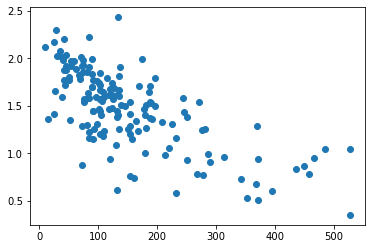

In [53]:
plt.scatter(df_both.PARW1_day, df_both.Lab_Chla)

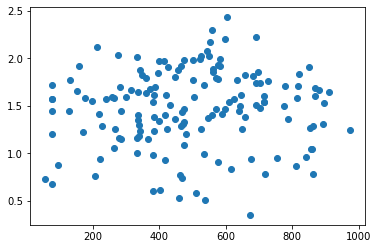

In [54]:
plt.scatter(df_both.PARAirFlags_day, df_both.Lab_Chla)

array([[ 1.        , -0.69513834],
       [-0.69513834,  1.        ]])

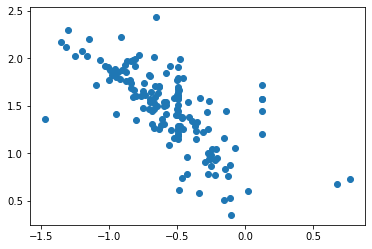

In [55]:
plt.scatter(np.log10(df_both.PAR_normalized_day), df_both.Lab_Chla)
np.corrcoef(np.log10(df_both.PAR_normalized_day), df_both.Lab_Chla)

array([[ 1.        , -0.68202763],
       [-0.68202763,  1.        ]])

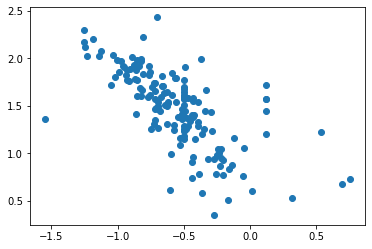

In [56]:
plt.scatter(np.log10(df_both.PAR_normalized_day_SMA3), df_both.Lab_Chla)
np.corrcoef(np.log10(df_both.PAR_normalized_day_SMA3), df_both.Lab_Chla)

another feature to generate could be a combination of temp in depths to show thestratification

# Model development

In [2090]:
# extract target as y from data
y = df_both['Lab_Chla']
X = df_both.drop(['Lab_Chla'], axis=1)
y.describe()

count    155.000000
mean       1.465002
std        0.402816
min        0.350248
25%        1.241853
50%        1.531479
75%        1.763382
max        2.294031
Name: Lab_Chla, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B07157190>,
      dtype=object)

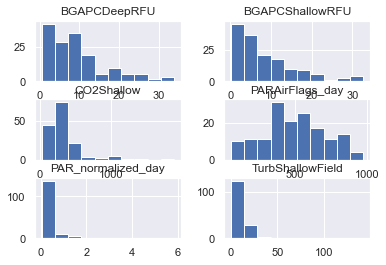

In [2136]:
# a simple feature selection based on correlation with chla_lab and feature redundancy
selected_features = ['BGAPCShallowRFU', 'BGAPCDeepRFU', 'PARAirFlags_day','PAR_normalized_day','TurbShallowField','CO2Shallow']
X_sel = X[selected_features]
X_sel.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B073AB160>,
      dtype=object)

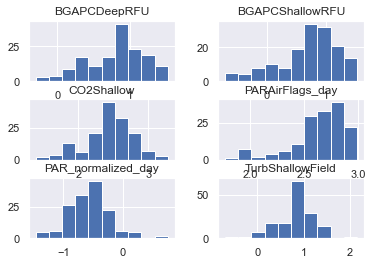

In [2137]:
#log-transform features because they all seem having log-normal distribution
X_sel_logTrans = X_sel.copy()
for feature in selected_features:
    if np.min(X_sel[feature]) > 0:
        X_sel_logTrans[feature] = pd.DataFrame(np.log10(X_sel[feature]))
    elif np.max(X_sel[feature]) < 0:
        X_sel_logTrans[feature] = pd.DataFrame(np.log10(abs(X_sel[feature])))
    elif np.min(X_sel[feature]) == 0:
        X_sel_logTrans[feature] = pd.DataFrame(np.log1p(X_sel[feature]))
        
X_sel_logTrans.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B074D31F0>,
      dtype=object)

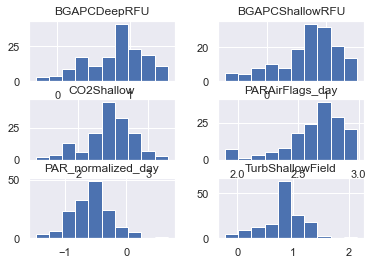

In [2138]:
# detect outliers and replace with median value
def reject_outliers(feature, m):
    return abs(feature - np.median(feature)) > m * np.std(feature)

features = X_sel_logTrans.copy()
for feature in features:
    idx_outlier = reject_outliers(features[feature], 3.5)
    features[feature][idx_outlier] = features[feature].median()

X_sel_logTrans = features.copy()
X_sel_logTrans.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B076C73A0>,
      dtype=object)

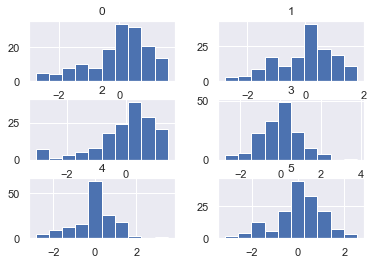

In [2139]:
# normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sel_logTrans_normalized = scaler.fit_transform(X_sel_logTrans)
pd.DataFrame(X_sel_logTrans_normalized).hist()

In [2144]:
## import models
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
#from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
#from sklearn.cross_decomposition import PLSRegression
#from sklearn.neural_network import MLPRegressor

#model = DecisionTreeRegressor(max_depth=100)
#model = RandomForestRegressor(n_estimators=100, random_state=0)
#model = XGBRegressor(booster='gblinear',n_estimators=100, random_state=0, learning_rate = 0.1)
#model = SVR(kernel = 'linear')
model = LinearRegression()
#model = PLSRegression(n_components =3)
#model = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000, random_state=0)


In [2145]:
# create a pipeline
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline(steps=[('model', model)])

In [2146]:
# cross validation and accuracy assessment of model
from sklearn.model_selection import cross_val_score
mae = 10**(-1 * cross_val_score(my_pipeline,X_sel_logTrans_normalized, y, cv=5, scoring='neg_mean_absolute_error').mean())
mae

1.3349034326126947

In [2160]:
# getting predictions values from cross validation
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(my_pipeline, X_sel_logTrans_normalized, y, cv=5)

In [2168]:
pd.DataFrame([{'chla': np.array(y)},{'chla_pred': y_pred}]).to_csv('model_eval.csv')

# ANOVA test

In [2148]:
data_for_statsmodels = pd.concat([y, pd.DataFrame(X_sel_logTrans, columns=selected_features, index = X.index)], axis = 1)
data_for_statsmodels.head()

Lab_Chla  BGAPCShallowRFU  BGAPCDeepRFU  PARAirFlags_day  \
2014-06-12  1.204120         0.469822      0.518514         2.683047   
2014-06-16  1.146128         0.230449      0.342423         2.453805   
2014-06-19  1.230449         0.255273      0.255273         2.536061   
2014-06-23  1.281942         0.322219      0.431364         2.357242   
2014-06-26  1.255273         0.041393      0.146128         2.426758   

            PAR_normalized_day  TurbShallowField  CO2Shallow  
2014-06-12           -0.495321          0.838849    2.569432  
2014-06-16           -0.496418          0.770852    2.723045  
2014-06-19           -0.495956          0.763428    2.679337  
2014-06-23           -0.497085          0.767156    2.567908  
2014-06-26           -0.457562          0.633468    2.533443

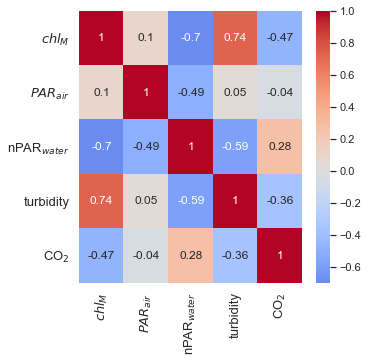

In [1860]:
for_corr = data_for_statsmodels.copy()
for_corr.drop(['BGAPCShallowRFU','BGAPCDeepRFU'],axis=1,inplace=True)
for_corr.rename(columns = {'Lab_Chla': '$chl_{M}$', 'TurbShallowField': 'turbidity', 'PARAirFlags_day':'$PAR_{air}$' , 'PAR_normalized_day':'nPAR$_{water}$',  'CO2Shallow':'CO$_{2}$' ,'WindSp':'wind speed'}, inplace=True)
correlation_matrix = for_corr.corr().round(2)  # it seems that this function is working even with nan values in data
plt.figure(figsize=(5,5))
g = sb.heatmap(data=correlation_matrix, annot=True,center=0.0, cmap='coolwarm')
sb.set(font_scale=1)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 13)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 13)
plt.yticks(rotation=0) 
plt.savefig('fig8.png', dpi=500, bbox_inches = 'tight')

In [2149]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod2 = ols('Lab_Chla ~ BGAPCShallowRFU + BGAPCDeepRFU + TurbShallowField + PAR_normalized_day + PARAirFlags_day + CO2Shallow', data = data_for_statsmodels).fit()
mod1 = ols('Lab_Chla ~ BGAPCShallowRFU', data = data_for_statsmodels).fit()
#sm.stats.anova_lm(mod1, mod2)
results = sm.stats.anova_lm(mod2, type=2)
#mod2.summary()
round(results,3)

df  sum_sq  mean_sq        F  PR(>F)
BGAPCShallowRFU       1.0  20.425   20.425  772.421   0.000
BGAPCDeepRFU          1.0   0.187    0.187    7.063   0.009
TurbShallowField      1.0   0.000    0.000    0.010   0.921
PAR_normalized_day    1.0   0.090    0.090    3.412   0.067
PARAirFlags_day       1.0   0.020    0.020    0.770   0.382
CO2Shallow            1.0   0.352    0.352   13.316   0.000
Residual            148.0   3.914    0.026      NaN     NaN

# Prediction by the model for time series of data

In [2153]:
scaler = StandardScaler()
df_buoy_ave_sel_logTrans_normalized = scaler.fit_transform(np.log10(df_buoy_ave[selected_features]))

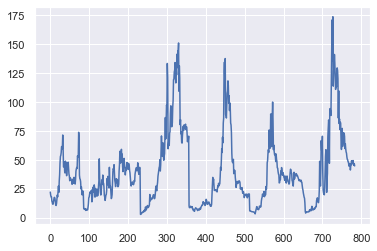

In [2175]:
model.fit(X_sel_logTrans_normalized, y)
df_buoy_ave['pred_val'] = model.predict(df_buoy_ave_sel_logTrans_normalized)
plt.plot(10**pred_val)

In [1687]:
#df_buoy_ave[['pred_val_PC','pred_val_ML']].to_csv('pred_values.csv')
#df_both[['Lab_Chla','ChlRFUShallow','BGAPCShallowRFU']].to_csv('df_both.csv')
# df[['Date_Time', 'ChlorophyllShallow','Dataset']].to_csv('df.csv')
# df_lab[['Date_Time','Lab_Chla', 'Dataset', 'sampledepth']].to_csv('df_lab.csv')

# fig10_paper1

we provide info for this figure from two seperate dataframes

In [2171]:
# exclude surface samples from this analyis
filt_sampledepth = df_lab['sampledepth'] != 0

In [2172]:
# grouping based on date and dataset
df_lab_ave_date_dataset = (df_lab[filt_sampledepth]).groupby([df_lab.Date_Time.dt.date,'Dataset']).agg({'Lab_Chla': 'median'}) 
df_lab_ave_date_dataset

Lab_Chla
Date_Time  Dataset                
2014-01-13 WTP            6.000000
2014-01-27 WTP            7.000000
2014-02-10 WTP           19.000000
2014-02-24 WTP           14.000000
2014-03-10 WTP            8.000000
2014-03-24 WTP           30.000000
2014-04-14 WTP           15.000000
2014-04-22 WTP            8.000000
2014-04-24 WTP            7.000000
2014-04-28 WTP            4.000000
2014-05-01 WTP            6.000000
2014-05-05 WTP            9.000000
2014-05-08 WTP           15.000000
2014-05-12 HPLC          21.435000
           WTP           27.000000
2014-05-15 WTP           48.000000
2014-05-20 WTP           33.000000
2014-05-22 WTP           22.000000
2014-05-26 HPLC          11.070000
           WTP           13.000000
2014-05-29 WTP           16.000000
2014-06-02 WTP           17.000000
2014-06-05 WTP           22.000000
2014-06-09 HPLC          15.335000
           WTP           19.000000
2014-06-12 WTP           16.000000
2014-06-16 WTP           14.000000
2014-06-19 WTP           17.000000
2014-06-23 HPLC          19.140000
           WTP           22.000000
2014-06-26 WTP           18.000000
2014-07-02 WTP           32.000000
2014-07-07 HPLC          43.565000
           WTP           63.000000
2014-07-10 WTP           25.000000
2014-07-14 WTP           80.000000
2014-07-17 WTP           28.000000
2014-07-21 HPLC          41.800000
           WTP           59.000000
2014-07-24 WTP           50.000000
2014-07-28 WTP           41.000000
2014-07-31 Calibration   37.565443
           WTP           48.000000
2014-08-05 HPLC          35.970000
           WTP           37.000000
2014-08-07 WTP           39.000000
2014-08-11 WTP           47.000000
2014-08-14 Calibration   28.047800
2014-08-18 HPLC          37.790000
           WTP           57.000000
2014-08-25 WTP           18.000000
2014-09-02 WTP           15.000000
2014-09-08 WTP           16.000000
2014-09-15 WTP           17.000000
2014-09-22 WTP           28.000000
2014-09-29 WTP           24.000000
2014-10-06 WTP           13.000000
2014-10-20 WTP           14.000000
2014-11-03 WTP           13.000000
2014-12-01 WTP            8.000000
2015-01-12 WTP           33.000000
2015-02-09 WTP           26.000000
2015-03-09 WTP           20.000000
2015-04-13 WTP           18.000000
2015-04-20 HPLC          55.530000
2015-05-11 HPLC          11.315000
           WTP           14.000000
2015-05-25 HPLC           9.100000
2015-05-29 Calibration   19.452600
2015-06-01 Survey        20.470000
2015-06-08 HPLC          19.685000
           WTP           34.000000
2015-06-10 Survey        31.150000
2015-06-22 HPLC          39.600000
2015-07-06 HPLC          29.030000
           WTP           53.000000
2015-07-13 Survey        18.750000
           WTP           26.000000
2015-07-20 HPLC          17.635000
           WTP           40.000000
2015-07-27 WTP           45.000000
2015-07-29 Calibration   48.328000
2015-07-30 Calibration   40.217000
2015-07-31 Calibration   45.911800
2015-08-04 HPLC          37.025000
           WTP           42.000000
2015-08-10 WTP           35.000000
2015-08-17 HPLC          48.755000
           WTP           61.000000
2015-08-24 Survey        56.320000
           WTP           54.000000
2015-09-14 WTP           26.000000
2015-09-28 WTP           23.000000
2015-10-21 Survey        13.070000
2016-01-11 WTP           16.000000
2016-02-08 WTP           29.000000
2016-03-14 WTP           11.000000
2016-04-11 WTP           12.000000
2016-04-12 Survey         8.370000
2016-05-09 HPLC           2.890000
           WTP            5.000000
2016-05-19 Survey         2.240000
2016-05-24 HPLC           3.155000
           WTP            7.000000
2016-05-30 WTP           10.000000
2016-06-06 HPLC          10.360000
           WTP           11.000000
2016-06-10 WTP           11.000000
2016-06-13 WTP            6.000000
2016-06-16 WTP           27.000000
2016-06-20 HPLC          17.560000
           WTP           26.000000
2016-06-23 WTP           18.000000
2

In [2173]:
# log-transform to normal distribution
df_lab_ave_date_dataset['Lab_Chla'] = np.log10(df_lab_ave_date_dataset['Lab_Chla'])
df_lab_ave_date_dataset

Lab_Chla
Date_Time  Dataset              
2014-01-13 WTP          0.778151
2014-01-27 WTP          0.845098
2014-02-10 WTP          1.278754
2014-02-24 WTP          1.146128
2014-03-10 WTP          0.903090
2014-03-24 WTP          1.477121
2014-04-14 WTP          1.176091
2014-04-22 WTP          0.903090
2014-04-24 WTP          0.845098
2014-04-28 WTP          0.602060
2014-05-01 WTP          0.778151
2014-05-05 WTP          0.954243
2014-05-08 WTP          1.176091
2014-05-12 HPLC         1.331123
           WTP          1.431364
2014-05-15 WTP          1.681241
2014-05-20 WTP          1.518514
2014-05-22 WTP          1.342423
2014-05-26 HPLC         1.044148
           WTP          1.113943
2014-05-29 WTP          1.204120
2014-06-02 WTP          1.230449
2014-06-05 WTP          1.342423
2014-06-09 HPLC         1.185684
           WTP          1.278754
2014-06-12 WTP          1.204120
2014-06-16 WTP          1.146128
2014-06-19 WTP          1.230449
2014-06-23 HPLC         1.281942
           WTP          1.342423
2014-06-26 WTP          1.255273
2014-07-02 WTP          1.505150
2014-07-07 HPLC         1.639138
           WTP          1.799341
2014-07-10 WTP          1.397940
2014-07-14 WTP          1.903090
2014-07-17 WTP          1.447158
2014-07-21 HPLC         1.621176
           WTP          1.770852
2014-07-24 WTP          1.698970
2014-07-28 WTP          1.612784
2014-07-31 Calibration  1.574789
           WTP          1.681241
2014-08-05 HPLC         1.555940
           WTP          1.568202
2014-08-07 WTP          1.591065
2014-08-11 WTP          1.672098
2014-08-14 Calibration  1.447899
2014-08-18 HPLC         1.577377
           WTP          1.755875
2014-08-25 WTP          1.255273
2014-09-02 WTP          1.176091
2014-09-08 WTP          1.204120
2014-09-15 WTP          1.230449
2014-09-22 WTP          1.447158
2014-09-29 WTP          1.380211
2014-10-06 WTP          1.113943
2014-10-20 WTP          1.146128
2014-11-03 WTP          1.113943
2014-12-01 WTP          0.903090
2015-01-12 WTP          1.518514
2015-02-09 WTP          1.414973
2015-03-09 WTP          1.301030
2015-04-13 WTP          1.255273
2015-04-20 HPLC         1.744528
2015-05-11 HPLC         1.053655
           WTP          1.146128
2015-05-25 HPLC         0.959041
2015-05-29 Calibration  1.288978
2015-06-01 Survey       1.311118
2015-06-08 HPLC         1.294135
           WTP          1.531479
2015-06-10 Survey       1.493458
2015-06-22 HPLC         1.597695
2015-07-06 HPLC         1.462847
           WTP          1.724276
2015-07-13 Survey       1.273001
           WTP          1.414973
2015-07-20 HPLC         1.246375
           WTP          1.602060
2015-07-27 WTP          1.653213
2015-07-29 Calibration  1.684199
2015-07-30 Calibration  1.604410
2015-07-31 Calibration  1.661924
2015-08-04 HPLC         1.568495
           WTP          1.623249
2015-08-10 WTP          1.544068
2015-08-17 HPLC         1.688019
           WTP          1.785330
2015-08-24 Survey       1.750663
           WTP          1.732394
2015-09-14 WTP          1.414973
2015-09-28 WTP          1.361728
2015-10-21 Survey       1.116276
2016-01-11 WTP          1.204120
2016-02-08 WTP          1.462398
2016-03-14 WTP          1.041393
2016-04-11 WTP          1.079181
2016-04-12 Survey       0.922725
2016-05-09 HPLC         0.460898
           WTP          0.698970
2016-05-19 Survey       0.350248
2016-05-24 HPLC         0.498999
           WTP          0.845098
2016-05-30 WTP          1.000000
2016-06-06 HPLC         1.015360
           WTP          1.041393
2016-06-10 WTP          1.041393
2016-06-13 WTP          0.778151
2016-06-16 WTP          1.431364
2016-06-20 HPLC         1.244525
           WTP          1.414973
2016-06-23 WTP          1.255273
2016-06-27 WTP          1.380211
2016-07-04 HPLC         1.614053
           WTP          1.505150
2016-07-07 WTP          1.633468
2016-07-11 WTP          1.591065
2016-07-14 WTP          1.770852
2016-07-18 HPLC         1.70445

In [2174]:
#  get rid of individual observations in one day
df_lab_ave_date_dataset = df_lab_ave_date_dataset[df_lab_ave_date_dataset.index.get_level_values('Date_Time').duplicated(keep=False)]
df_lab_ave_date_dataset

Lab_Chla
Date_Time  Dataset              
2014-05-12 HPLC         1.331123
           WTP          1.431364
2014-05-26 HPLC         1.044148
           WTP          1.113943
2014-06-09 HPLC         1.185684
           WTP          1.278754
2014-06-23 HPLC         1.281942
           WTP          1.342423
2014-07-07 HPLC         1.639138
           WTP          1.799341
2014-07-21 HPLC         1.621176
           WTP          1.770852
2014-07-31 Calibration  1.574789
           WTP          1.681241
2014-08-05 HPLC         1.555940
           WTP          1.568202
2014-08-18 HPLC         1.577377
           WTP          1.755875
2015-05-11 HPLC         1.053655
           WTP          1.146128
2015-06-08 HPLC         1.294135
           WTP          1.531479
2015-07-06 HPLC         1.462847
           WTP          1.724276
2015-07-13 Survey       1.273001
           WTP          1.414973
2015-07-20 HPLC         1.246375
           WTP          1.602060
2015-08-04 HPLC         1.568495
           WTP          1.623249
2015-08-17 HPLC         1.688019
           WTP          1.785330
2015-08-24 Survey       1.750663
           WTP          1.732394
2016-05-09 HPLC         0.460898
           WTP          0.698970
2016-05-24 HPLC         0.498999
           WTP          0.845098
2016-06-06 HPLC         1.015360
           WTP          1.041393
2016-06-20 HPLC         1.244525
           WTP          1.414973
2016-07-04 HPLC         1.614053
           WTP          1.505150
2016-07-18 HPLC         1.704451
           WTP          1.633468
2016-08-02 HPLC         1.907707
           WTP          1.799341
2016-08-15 HPLC         2.174801
           WTP          1.892095
2016-08-29 HPLC         1.738503
           WTP          1.929419
2016-09-22 Survey       1.546666
           WTP          1.770852
2017-06-12 Survey       0.860937
           WTP          1.079181
2017-07-31 HPLC         1.790531
           WTP          1.826075
2017-08-14 Calibration  1.832205
           HPLC         1.926008
           WTP          1.880814
2017-08-28 Calibration  1.568854
           HPLC         1.448474
           WTP          1.633468
2018-05-14 HPLC         0.917193
           WTP          0.698970
2018-05-28 HPLC         0.673203
           WTP          0.602060
2018-06-19 Calibration  1.383815
           Survey       1.321598
2018-06-25 Calibration  1.417389
           HPLC         1.368955
           WTP          1.414973
2018-07-03 Calibration  1.835373
           WTP          1.903090
2018-07-09 Calibration  1.947973
           HPLC         2.056457
           WTP          2.000000
2018-07-16 Calibration  1.773530
           WTP          1.643453
2018-07-30 Calibration  1.521792
           WTP          1.477121
2018-08-21 Calibration  1.582404
           Survey       1.056905
2019-06-12 Calibration  0.639462
           HPLC         1.051989
2019-07-22 HPLC         1.527386
           Survey       1.912381

In [2177]:
df_lab_ave_date_dataset['Dataset'] = df_lab_ave_date_dataset.index.get_level_values('Dataset')

<ipython-input-2177-b642aeb1679d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lab_ave_date_dataset['Dataset'] = df_lab_ave_date_dataset.index.get_level_values('Dataset')


In [2178]:
df_lab_ave_date_dataset = df_lab_ave_date_dataset.droplevel(1).copy()
df_lab_ave_date_dataset

In [2180]:
# inner merge both dataframe
df_lab_ave_date_dataset = pd.merge(df_lab_ave_date_dataset, df_buoy_ave['pred_Chla'], left_index=True, right_index=True, how='inner')
df_lab_ave_date_dataset

Lab_Chla      Dataset  pred_Chla
2014-06-23  1.281942         HPLC   1.238962
2014-06-23  1.342423          WTP   1.238962
2014-07-07  1.639138         HPLC   1.729176
2014-07-07  1.799341          WTP   1.729176
2014-07-21  1.621176         HPLC   1.645667
2014-07-21  1.770852          WTP   1.645667
2014-07-31  1.574789  Calibration   1.510164
2014-07-31  1.681241          WTP   1.510164
2014-08-05  1.555940         HPLC   1.502319
2014-08-05  1.568202          WTP   1.502319
2014-08-18  1.577377         HPLC   1.634043
2014-08-18  1.755875          WTP   1.634043
2015-06-08  1.294135         HPLC   1.349473
2015-06-08  1.531479          WTP   1.349473
2015-07-06  1.462847         HPLC   1.293518
2015-07-06  1.724276          WTP   1.293518
2015-07-13  1.273001       Survey   1.535670
2015-07-13  1.414973          WTP   1.535670
2015-07-20  1.246375         HPLC   1.536094
2015-07-20  1.602060          WTP   1.536094
2015-08-04  1.568495         HPLC   1.445199
2015-08-04  1.623249          WTP   1.445199
2015-08-17  1.688019         HPLC   1.680560
2015-08-17  1.785330          WTP   1.680560
2015-08-24  1.750663       Survey   1.660648
2015-08-24  1.732394          WTP   1.660648
2016-05-24  0.498999         HPLC   0.692952
2016-05-24  0.845098          WTP   0.692952
2016-06-06  1.015360         HPLC   0.956606
2016-06-06  1.041393          WTP   0.956606
2016-06-20  1.244525         HPLC   1.307279
2016-06-20  1.414973          WTP   1.307279
2016-07-04  1.614053         HPLC   1.612696
2016-07-04  1.505150          WTP   1.612696
2016-07-18  1.704451         HPLC   1.730759
2016-07-18  1.633468          WTP   1.730759
2016-08-02  1.907707         HPLC   1.875600
2016-08-02  1.799341          WTP   1.875600
2016-08-15  2.174801         HPLC   2.137349
2016-08-15  1.892095          WTP   2.137349
2016-08-29  1.738503         HPLC   1.928595
2016-08-29  1.929419          WTP   1.928595
2017-06-12  0.860937       Survey   1.043799
2017-06-12  1.079181          WTP   1.043799
2017-07-31  1.790531         HPLC   1.697162
2017-07-31  1.826075          WTP   1.697162
2017-08-14  1.832205  Calibration   1.972584
2017-08-14  1.926008         HPLC   1.972584
2017-08-14  1.880814          WTP   1.972584
2017-08-28  1.568854  Calibration   1.660271
2017-08-28  1.448474         HPLC   1.660271
2017-08-28  1.633468          WTP   1.660271
2018-05-28  0.673203         HPLC   0.739791
2018-05-28  0.602060          WTP   0.739791
2018-06-19  1.383815  Calibration   1.280812
2018-06-19  1.321598       Survey   1.280812
2018-06-25  1.417389  Calibration   1.303677
2018-06-25  1.368955         HPLC   1.303677
2018-06-25  1.414973          WTP   1.303677
2018-07-03  1.835373  Calibration   1.763005
2018-07-03  1.903090          WTP   1.763005
2018-07-09  1.947973  Calibration   1.926661
2018-07-09  2.056457         HPLC   1.926661
2018-07-09  2.000000          WTP   1.926661
2018-07-16  1.773530  Calibration   1.794592
2018-07-16  1.643453          WTP   1.794592
2018-07-30  1.521792  Calibration   1.493343
2018-07-30  1.477121          WTP   1.493343
2018-08-21  1.582404  Calibration   1.504832
2018-08-21  1.056905       Survey   1.504832
2019-06-12  0.639462  Calibration   0.861766
2019-06-12  1.051989         HPLC   0.861766
2019-07-22  1.527386         HPLC   1.753264
2019-07-22  1.912381       Survey   1.753264

In [2181]:
df_lab_ave_date_dataset_par = df_lab_ave_date_dataset.groupby([df_lab_ave_date_dataset.index]).agg({'Lab_Chla': ['mean','std']})
df_lab_ave_date_dataset_par

In [2183]:
# inner merge both dataframe
df_both_pred_lab = pd.merge(df_lab_ave_date_dataset_par, df_buoy_ave['pred_Chla'], left_index=True, right_index=True, how='inner')
df_both_pred_lab

C:\Users\amchegoo\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


(Lab_Chla, mean)  (Lab_Chla, std)  pred_Chla
2014-06-23          1.312182         0.042766   1.238962
2014-07-07          1.719239         0.113281   1.729176
2014-07-21          1.696014         0.105837   1.645667
2014-07-31          1.628015         0.075273   1.510164
2014-08-05          1.562071         0.008670   1.502319
2014-08-18          1.666626         0.126217   1.634043
2015-06-08          1.412807         0.167827   1.349473
2015-07-06          1.593561         0.184858   1.293518
2015-07-13          1.343987         0.100389   1.535670
2015-07-20          1.424218         0.251507   1.536094
2015-08-04          1.595872         0.038717   1.445199
2015-08-17          1.736674         0.068809   1.680560
2015-08-24          1.741528         0.012918   1.660648
2016-05-24          0.672049         0.244729   0.692952
2016-06-06          1.028376         0.018408   0.956606
2016-06-20          1.329749         0.120526   1.307279
2016-07-04          1.559602         0.077006   1.612696
2016-07-18          1.668960         0.050192   1.730759
2016-08-02          1.853524         0.076627   1.875600
2016-08-15          2.033448         0.199904   2.137349
2016-08-29          1.833961         0.134998   1.928595
2017-06-12          0.970059         0.154322   1.043799
2017-07-31          1.808303         0.025133   1.697162
2017-08-14          1.879675         0.046912   1.972584
2017-08-28          1.550266         0.093887   1.660271
2018-05-28          0.637631         0.050305   0.739791
2018-06-19          1.352707         0.043994   1.280812
2018-06-25          1.400439         0.027293   1.303677
2018-07-03          1.869232         0.047883   1.763005
2018-07-09          2.001476         0.054257   1.926661
2018-07-16          1.708492         0.091979   1.794592
2018-07-30          1.499456         0.031587   1.493343
2018-08-21          1.319655         0.371584   1.504832
2019-06-12          0.845725         0.291701   0.861766
2019-07-22          1.719884         0.272233   1.753264

In [2184]:
df_both_pred_lab.dropna(axis=0,inplace=True)

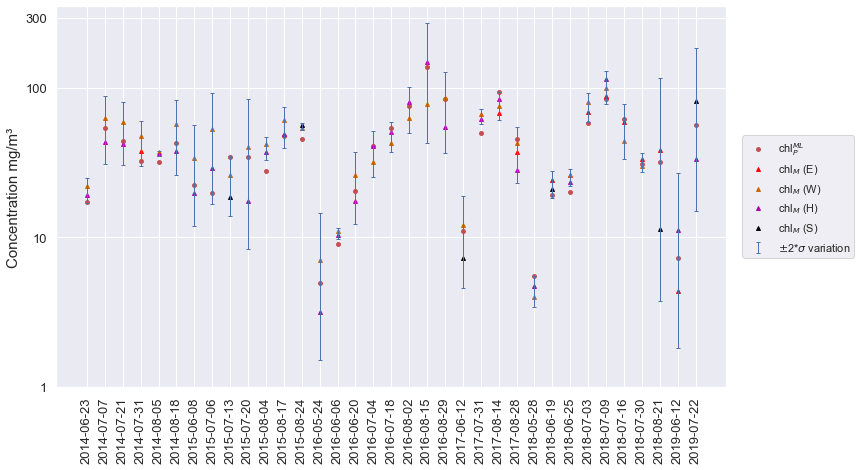

In [2186]:
import matplotlib.dates as mdates
plt.figure(figsize=(12,7))
df_both_pred_lab['dates']=df_both_pred_lab.index
dates = df_both_pred_lab['dates']
plt.scatter(dates.apply(lambda x: x.strftime('%Y-%m-%d')), df_both_pred_lab['pred_Chla'], color = 'r', s = 15, label = 'chl$^{ML}_{P}$')
plt.errorbar(dates.apply(lambda x: x.strftime('%Y-%m-%d')), df_both_pred_lab[('Lab_Chla', 'mean')], 2*df_both_pred_lab[('Lab_Chla', 'std')],  ls='none', capsize = 2, elinewidth = 1 , label = r'$\pm$' + '2*' + r'$\sigma$' + ' variation')

df_lab_ave_date_dataset['dates'] = df_lab_ave_date_dataset.index
dates1 = df_lab_ave_date_dataset[df_lab_ave_date_dataset['Dataset']=='Calibration']['dates']
dates2 = df_lab_ave_date_dataset[df_lab_ave_date_dataset['Dataset']=='WTP']['dates']
dates3 = df_lab_ave_date_dataset[df_lab_ave_date_dataset['Dataset']=='HPLC']['dates']
dates4 = df_lab_ave_date_dataset[df_lab_ave_date_dataset['Dataset']=='Survey']['dates']

plt.scatter(dates1.apply(lambda x: x.strftime('%Y-%m-%d')), df_lab_ave_date_dataset[df_lab_ave_date_dataset['Dataset']=='Calibration']['Lab_Chla'],  marker = '^', color = [1,0,0], s = 15, label = 'chl$_{M}$ (E)')
plt.scatter(dates2.apply(lambda x: x.strftime('%Y-%m-%d')), df_lab_ave_date_dataset[df_lab_ave_date_dataset['Dataset']=='WTP']['Lab_Chla'],  marker = '^', color = [.8,0.4,0], s = 15, label = 'chl$_{M}$ (W)')
plt.scatter(dates3.apply(lambda x: x.strftime('%Y-%m-%d')), df_lab_ave_date_dataset[df_lab_ave_date_dataset['Dataset']=='HPLC']['Lab_Chla'],  marker = '^', color = [.7,0,.7], s = 15, label = 'chl$_{M}$ (H)')
plt.scatter(dates4.apply(lambda x: x.strftime('%Y-%m-%d')), df_lab_ave_date_dataset[df_lab_ave_date_dataset['Dataset']=='Survey']['Lab_Chla'],  marker = '^', color = 'black', s = 15, label = 'chl$_{M}$ (S)')

plt.xticks(fontsize= 13 , rotation = 90)
plt.yticks(ticks = [0, 1, 2, 2.47],labels = [1, 10, 100, 300], fontsize= 13 )
plt.ylabel('Concentration mg/m\u00b3',fontsize= 15 )
#plt.grid()
#ax1.set_yscale('log')
plt.legend(ncol=1, loc='center right', bbox_to_anchor=(1.2,.5))
#plt.savefig('fig10.png', dpi=500, bbox_inches = 'tight')


In [1882]:
#compute reliability
sum(abs(df_both_pred_lab[('Lab_Chla', 'mean')] - df_both_pred_lab['pred_Chla'])<3*df_both_pred_lab[('Lab_Chla', 'std')])/35

0.8285714285714286

# Semi-variogram analysis (not complete yet)

In [1937]:

from skgstat import Variogramb

In [1988]:
test = df_lab[df_lab.Date_Time.dt.date== datetime.date(datetime.strptime('2019-09-23', '%Y-%m-%d'))]
test

Date_Time Dataset  SiteNumber  Lab_Chla  sampledepth  \
109192 2019-09-23 10:30:00  Survey           5     14.48          1.0   
109198 2019-09-23 10:10:00  Survey           4     19.69          1.0   
109246 2019-09-23 11:10:00  Survey           6     21.27          1.0   
109275 2019-09-23 11:40:00  Survey           7     15.33          1.0   
109301 2019-09-23 12:05:00  Survey           8     13.24          1.0   
109332 2019-09-23 12:25:00  Survey          10     11.32          1.0   
109357 2019-09-23 12:40:00  Survey          11     12.78          1.0   
109368 2019-09-23 13:00:00  Survey          12      0.20          1.0   
109393 2019-09-23 13:20:00  Survey          13      7.47          1.0   
109418 2019-09-23 13:40:00  Survey          14     15.05          1.0   
109444 2019-09-23 13:55:00  Survey          15     11.32          1.0   
109468 2019-09-23 14:15:00  Survey          16     12.89          1.0   

         latitude   Longitude  
109192  50.573180 -105.341740  
109198  50.586530 -105.384210  
109246  50.617800 -105.443830  
109275  50.656150 -105.520580  
109301  50.682950 -105.559100  
109332  50.711590 -105.587770  
109357  50.720740 -105.606940  
109368  50.721563 -105.603458  
109393  50.722170 -105.599310  
109418  50.734630 -105.629260  
109444  50.735690 -105.626390  
109468  50.736320 -105.623710

In [1991]:
coords = np.array(test[['latitude','Longitude']])

values = np.array(test['Lab_Chla'])

V = Variogram(coords, values)

C:\Users\amchegoo\Anaconda3\lib\site-packages\skgstat\Variogram.py:1636: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


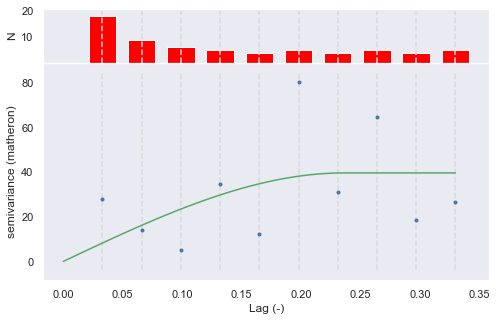

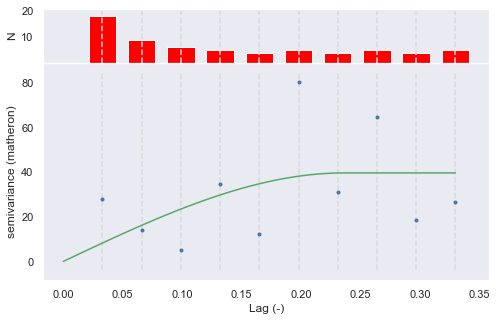

In [1992]:
 V.plot()

C:\Users\amchegoo\Anaconda3\lib\site-packages\skgstat\Variogram.py:1780: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


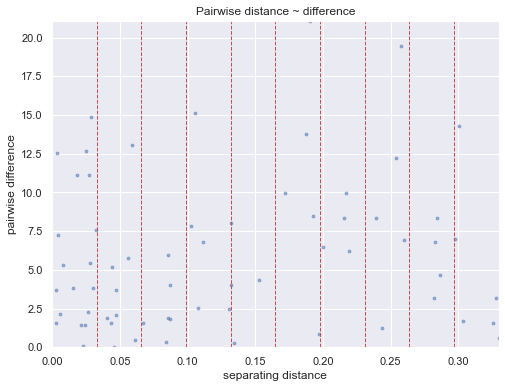

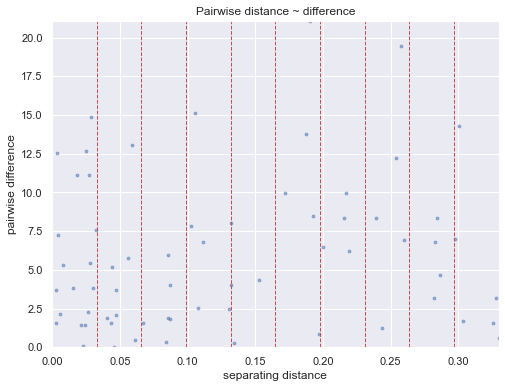

In [1999]:
V.distance_difference_plot()

In [2036]:
df_buoy_ave.ChlorophyllShallow.mean()

12.822999792272016